#### Note

In [ ]:
# pd.set_option('display.max_rows', 100) # 최대 display option set
# pd.reset_option('display.max_rows') # 최대 display option reset

# from datetime import timedelta
# datetime.datetime(2019,12,31) - datetime.datetime(2008,1,1)

#### Import

In [2]:
# 기본
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from matplotlib import font_manager, rc
import platform
from tqdm import tqdm
import sklearn
from sklearn import linear_model
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from sklearn.model_selection import train_test_split

# time
import datetime

# crawling
import requests
import lxml.html
import sqlite3
from pandas.io import sql
from bs4 import BeautifulSoup

# 한글 폰트 설정
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#### ABSI 정의
체형지수(ABSI) = 허리둘레 / ((BMI ** 2/3) × (신장 ** 1/2))

#### 07 - 20 기본 DB concat              
기타 검진변수들 일치하는 시점부터 적당히 잘라서 합치자        
- 07 이전에는 wc가 없음

필수변수   
- HE_ht         
- HE_wt        
- HE_BMI         
- HE_wc

건보공단이랑 일치하는 변수 list

- year : 조사연도
- ID : 개인 아이디
- psu : 조사구번호
- HE_ht : 신장
- HE_wt : 체중        


- HE_BMI : 체질량지수
- HE_sbp_tr : 최종 수축기 혈압(보정값)
- HE_dbp_tr : 최종 이완기 혈압(보정값)
- HE_obe : 비만유병여부(19세이상) - categorical
- HE_Upro : 요단백  - categorical
- HE_HbA1c : 당화혈색소
- HE_glu : 공복혈당
- HE_chol : 총콜레스테롤
- HE_ast : GOT
- HE_alt : GPT
- HE_tb : 흉부영상 판독결과  - categorical
- HE_HP_tr : 고혈압 유병여부(30세이상, 보정값) - categorical
- DI3_lt : 뇌졸중 평생유병여부 - categorical
- DI4_lt : 심근경색증 또는 협심증 평생유병여부 - categorical
- HE_DM : 당뇨병유병여부(19세이상) - categorical
- HE_wc : 허리둘레
- HE_HDL_st2 : 전환식 HDL-콜레스테롤
- HE_LDL_drct : LDL콜레스테롤_직접검사
- HE_crea : 혈중크레아티닌
- D_1_1 : 주관적 건강상태 - categorical       


- L_BR1 : 조사 1일전 아침식사 섭취여부 - categorical
- L_LN1 : 조사 1일전 점심식사 섭취여부 - categorical
- L_DN1 : 조사 1일전 저녁식사 섭취여부 - categorical
--> 이거 세개를 하나로 축소해야 함 (건보공단 변수는 하나임)


- N_NA : 1일 나트륨 섭취량(mg)     


- F_BEEF : 쇠고기 (국, 탕, 찌개, 편육, 장조림, 구이,볶음, 비프까스, 튀김, 찜 포함) - categorical
- F_CHICK : 닭고기 (삼계탕, 백숙, 찜, 튀김, 조림, 볶음 포함) - categorical
- F_PORK : 돼지고기 (찌개, 구이, 볶음, 돈까스, 튀김 포함) - categorical
- --> 이거 세개를 하나로 축소해야 함 (건보공단 변수는 하나임)     


- BS3_1 : (성인) 현재흡연 여부 - categorical
- BS3_2 : (성인) 현재흡연자 하루 평균 흡연량 - numerical 이나, 888 / 999 로 처리된 거 0으로 전처리 해줘야 함    


- BD1_11 : (만12세이상) 1년간 음주빈도 - categorical
- BD2_1 : (만12세이상) 한번에 마시는 음주량 - categorical     


- BE3_21 : 1주일간 중등도 신체활동 일수 - categorical
- BE3_22 : 중등도 신체활동 지속시간(시간) - numerical 이나, 88 / 99 로 처리된 거 0으로 전처리 해줘야 함     


- BP1 : 평소 스트레스 인지 정도 - categorical    


- DI3_dg : 뇌졸중 의사진단여부 - categorical
- DI4_dg : 심근경색증 또는 협심증 의사진단여부 - categorical
- DI1_dg : 고혈압 의사진단여부 - categorical
- DE1_dg : 당뇨병 의사진단여부 (소아청소년 포함) - categorical
- DI2_dg : 고지혈증 의사진단여부 - categorical   


- DI3_pt : 뇌졸중 치료 - categorical
- DI4_pt : 심근경색증 또는 협심증 치료 - categorical
- DI1_pt : 고혈압 치료 - categorical
- DE1_pt : 당뇨병 치료 - categorical  
- DI2_pt : 고지혈증  치료 - categorical      


- HE_hepaB : B형간염표면항원 양성여부(10세이상) - categorical
- BS6_2_2 : (성인) 과거흡연자 흡연 기간(월) - numerical 이나, 88 / 99 로 처리된 거 0으로 전처리 해줘야 함
- BS6_3 : (성인) 과거흡연자 하루 평균 흡연량 - numerical 이나, 88 / 99 로 처리된 거 0으로 전처리 해줘야 함
- BS2_1 : (성인) 흡연 시작연령 - numerical 이나, 88 / 99 로 처리된 거 0으로 전처리 해줘야 함     


- pa_high : 격렬한 신체활동 실천율 - categorical
- pa_mid : 중등도 신체활동 실천율 - categorical  
- pa_walk : 걷기 실천율 - categorical    


- DJ1_dg : 폐결핵 또는 폐외결핵 의사진단여부 (소아, 청소년 포함) - categorical
- DJ1_pt : 폐결핵 또는 폐외결핵 치료 - categorical

In [41]:
# 기본 DB 불러오기

basic1 = pd.read_csv('D:\\국민건강영양조사\\국민건강영양조사_기수별통합\\1998-2019 기본DB\\기본DB_1기 (1998).csv', encoding = 'euc-kr', low_memory = False)
basic2 = pd.read_csv('D:\\국민건강영양조사\\국민건강영양조사_기수별통합\\1998-2019 기본DB\\기본DB_2기 (2001).csv', encoding = 'euc-kr', low_memory = False)
basic3 = pd.read_csv('D:\\국민건강영양조사\\국민건강영양조사_기수별통합\\1998-2019 기본DB\\기본DB_3기 (2005).csv', encoding = 'euc-kr', low_memory = False)
basic4 = pd.read_csv('D:\\국민건강영양조사\\국민건강영양조사_기수별통합\\1998-2019 기본DB\\기본DB_4기 (2007-2009).csv', encoding = 'euc-kr', low_memory = False)
basic5 = pd.read_csv('D:\\국민건강영양조사\\국민건강영양조사_기수별통합\\1998-2019 기본DB\\기본DB_5기 (2010-2012).csv', encoding = 'euc-kr', low_memory = False)
basic6 = pd.read_csv('D:\\국민건강영양조사\\국민건강영양조사_기수별통합\\1998-2019 기본DB\\기본DB_6기 (2013-2015).csv', encoding = 'euc-kr', low_memory = False)
basic7 = pd.read_csv('D:\\국민건강영양조사\\국민건강영양조사_기수별통합\\1998-2019 기본DB\\기본DB_7기 (2016-2017).csv', encoding = 'euc-kr', low_memory = False)
basic18 = pd.read_sas('D:\\국민건강영양조사\\1998-2020 기본DB\\hn18_all.sas7bdat')
basic19 = pd.read_sas('D:\\국민건강영양조사\\1998-2020 기본DB\\hn19_all.sas7bdat')
basic20 = pd.read_sas('D:\\국민건강영양조사\\1998-2020 기본DB\\hn20_all.sas7bdat')

In [6]:
# 4기부터 wc 있어서 나중에 추가

basic4_p = basic4[['year', 'ID', 'sex', 'age', 'psu', 'HE_ht', 'HE_wt', 'HE_BMI', 'HE_obe', 'HE_Upro',
                      'HE_HbA1c', 'HE_glu', 'HE_chol', 'HE_ast', 'HE_alt', 
                      'HE_wc', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea', 'D_1_1', 
                      'N_NA', 'BS3_1', 'BS3_2', 'BD1_11', 'BD2_1', 
                      'BP1', 'DI3_dg', 'DI4_dg', 'DI1_dg', 'DE1_dg', 'DI2_dg', 'DI3_pt', 'DI4_pt', 'DI1_pt', 'DE1_pt',
                      'DI2_pt', 'HE_hepaB', 'BS6_2_2', 'BS6_3', 'BS2_1']]

In [7]:
# 'DJ1_dg', 'DJ1_pt', 'HW_MS' 삭제 (없음) 
# 'HE_tb', 'F_BEEF', 'HE_dbp_tr', 'L_LN1', 'L_DN1', 'DI4_lt', 'F_CHICK', 'F_PORK', 'HE_sbp_tr', 'L_BR1', 'DI3_lt', 'HE_HP_tr' 삭제 (6기에 없음)
# 'pa_mid', 'BE3_21', 'pa_high', 'BE3_22', 'pa_walk' 삭제 (7기에 없음)
# 'HE_DM' 삭제 (19년도에 없음)
basic5_p = basic5[['year', 'ID', 'sex', 'age', 'psu', 'HE_ht', 'HE_wt', 'HE_BMI', 'HE_obe', 'HE_Upro',
                      'HE_HbA1c', 'HE_glu', 'HE_chol', 'HE_ast', 'HE_alt', 
                      'HE_wc', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea', 'D_1_1', 
                      'N_NA', 'BS3_1', 'BS3_2', 'BD1_11', 'BD2_1', 
                      'BP1', 'DI3_dg', 'DI4_dg', 'DI1_dg', 'DE1_dg', 'DI2_dg', 'DI3_pt', 'DI4_pt', 'DI1_pt', 'DE1_pt',
                      'DI2_pt', 'HE_hepaB', 'BS6_2_2', 'BS6_3', 'BS2_1']]

In [8]:
# 'HE_tb', 'F_BEEF', 'HE_dbp_tr', 'L_LN1', 'L_DN1', 'DI4_lt', 'F_CHICK', 'F_PORK', 'HE_sbp_tr', 'L_BR1', 'DI3_lt', 'HE_HP_tr' 삭제 (없음)
# 'pa_mid', 'BE3_21', 'pa_high', 'BE3_22', 'pa_walk' 삭제 (7기에 없음)
# 'HE_DM' 삭제 (19년도에 없음)
basic6_p = basic6[['year', 'ID', 'sex', 'age', 'psu', 'HE_ht', 'HE_wt', 'HE_BMI', 'HE_obe', 'HE_Upro',
                      'HE_HbA1c', 'HE_glu', 'HE_chol', 'HE_ast', 'HE_alt', 
                      'HE_wc', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea', 'D_1_1', 
                      'N_NA', 'BS3_1', 'BS3_2', 'BD1_11', 'BD2_1', 
                      'BP1', 'DI3_dg', 'DI4_dg', 'DI1_dg', 'DE1_dg', 'DI2_dg', 'DI3_pt', 'DI4_pt', 'DI1_pt', 'DE1_pt',
                      'DI2_pt', 'HE_hepaB', 'BS6_2_2', 'BS6_3', 'BS2_1']]

In [9]:
# 'pa_mid', 'BE3_21', 'pa_high', 'BE3_22', 'pa_walk' 삭제 (없음)
# 'HE_DM' 삭제 (19년도에 없음)
basic7_p = basic7[['year', 'ID', 'sex', 'age', 'psu', 'HE_ht', 'HE_wt', 'HE_BMI', 'HE_obe', 'HE_Upro',
                      'HE_HbA1c', 'HE_glu', 'HE_chol', 'HE_ast', 'HE_alt', 
                      'HE_wc', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea', 'D_1_1', 
                      'N_NA', 'BS3_1', 'BS3_2', 'BD1_11', 'BD2_1', 
                      'BP1', 'DI3_dg', 'DI4_dg', 'DI1_dg', 'DE1_dg', 'DI2_dg', 'DI3_pt', 'DI4_pt', 'DI1_pt', 'DE1_pt',
                      'DI2_pt', 'HE_hepaB', 'BS6_2_2', 'BS6_3', 'BS2_1']]

In [10]:
# 'HE_DM' 삭제 (19년도에 없음)
basic18_p = basic18[['year', 'ID', 'sex', 'age', 'psu', 'HE_ht', 'HE_wt', 'HE_BMI', 'HE_obe', 'HE_Upro',
                      'HE_HbA1c', 'HE_glu', 'HE_chol', 'HE_ast', 'HE_alt', 
                      'HE_wc', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea', 'D_1_1', 
                      'N_NA', 'BS3_1', 'BS3_2', 'BD1_11', 'BD2_1', 
                      'BP1', 'DI3_dg', 'DI4_dg', 'DI1_dg', 'DE1_dg', 'DI2_dg', 'DI3_pt', 'DI4_pt', 'DI1_pt', 'DE1_pt',
                      'DI2_pt', 'HE_hepaB', 'BS6_2_2', 'BS6_3', 'BS2_1']]

In [11]:
# 'HE_DM' 삭제 
basic19_p = basic19[['year', 'ID', 'sex', 'age', 'psu', 'HE_ht', 'HE_wt', 'HE_BMI', 'HE_obe', 'HE_Upro',
                      'HE_HbA1c', 'HE_glu', 'HE_chol', 'HE_ast', 'HE_alt', 
                      'HE_wc', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea', 'D_1_1', 
                      'N_NA', 'BS3_1', 'BS3_2', 'BD1_11', 'BD2_1', 
                      'BP1', 'DI3_dg', 'DI4_dg', 'DI1_dg', 'DE1_dg', 'DI2_dg', 'DI3_pt', 'DI4_pt', 'DI1_pt', 'DE1_pt',
                      'DI2_pt', 'HE_hepaB', 'BS6_2_2', 'BS6_3', 'BS2_1']]

In [12]:
basic20_p = basic20[['year', 'ID', 'sex', 'age', 'psu', 'HE_ht', 'HE_wt', 'HE_BMI', 'HE_obe', 'HE_Upro',
                      'HE_HbA1c', 'HE_glu', 'HE_chol', 'HE_ast', 'HE_alt', 
                      'HE_wc', 'HE_HDL_st2', 'HE_LDL_drct', 'HE_crea', 'D_1_1', 
                      'N_NA', 'BS3_1', 'BS3_2', 'BD1_11', 'BD2_1', 
                      'BP1', 'DI3_dg', 'DI4_dg', 'DI1_dg', 'DE1_dg', 'DI2_dg', 'DI3_pt', 'DI4_pt', 'DI1_pt', 'DE1_pt',
                      'DI2_pt', 'HE_hepaB', 'BS6_2_2', 'BS6_3', 'BS2_1']]

In [13]:
basic0719 = pd.concat([basic4_p, basic5_p, basic6_p, basic7_p, basic18_p, basic19_p], axis = 0)
basic0719

,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_obe,HE_Upro,...,DI2_dg,DI3_pt,DI4_pt,DI1_pt,DE1_pt,DI2_pt,HE_hepaB,BS6_2_2,BS6_3,BS2_1
0,2007.0,b'A548480901',1.0,55.0,b'A548',159.9,60.6,23.701493,2.0,0.0,...,8.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,88.0
1,2007.0,b'A548480902',2.0,50.0,b'A548',157.0,51.4,20.852773,2.0,0.0,...,8.0,8.0,8.0,0.0,8.0,8.0,0.0,99.0,1.0,22.0
2,2007.0,b'A548480903',1.0,23.0,b'A548',NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007.0,b'A548480904',2.0,21.0,b'A548',161.1,50.0,19.265440,2.0,1.0,...,8.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,14.0
4,2007.0,b'A548560901',2.0,35.0,b'A548',164.0,73.3,27.253123,3.0,NaN,...,8.0,8.0,8.0,8.0,8.0,8.0,0.0,3.0,3.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8105,2019.0,b'R504381902',2.0,48.0,b'R504',155.1,49.4,20.535409,2.0,1.0,...,0.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0
8106,2019.0,b'R504393801',1.0,47.0,b'R504',166.5,62.1,22.400779,2.0,0.0,...,0.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0
8107,2019.0,b'R504393802',2.0,43.0,b'R504',162.5,40.6,15.375148,1.0,0.0,...,0.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0
8108,2019.0,b'R504393803',2.0,16.0,b'R504',162.5,39.2,14.844970,NaN,0.0,...,8.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0


In [14]:
basic0720 = pd.concat([basic4_p, basic5_p, basic6_p, basic7_p, basic18_p, basic19_p, basic20_p], axis = 0)
basic0720

,year,ID,sex,age,psu,HE_ht,HE_wt,HE_BMI,HE_obe,HE_Upro,...,DI2_dg,DI3_pt,DI4_pt,DI1_pt,DE1_pt,DI2_pt,HE_hepaB,BS6_2_2,BS6_3,BS2_1
0,2007.0,b'A548480901',1.0,55.0,b'A548',159.9,60.6,23.701493,2.0,0.0,...,8.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,88.0
1,2007.0,b'A548480902',2.0,50.0,b'A548',157.0,51.4,20.852773,2.0,0.0,...,8.0,8.0,8.0,0.0,8.0,8.0,0.0,99.0,1.0,22.0
2,2007.0,b'A548480903',1.0,23.0,b'A548',NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2007.0,b'A548480904',2.0,21.0,b'A548',161.1,50.0,19.265440,2.0,1.0,...,8.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,14.0
4,2007.0,b'A548560901',2.0,35.0,b'A548',164.0,73.3,27.253123,3.0,NaN,...,8.0,8.0,8.0,8.0,8.0,8.0,0.0,3.0,3.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7354,2020.0,b'R804366601',2.0,61.0,b'R804',155.2,57.6,23.913275,3.0,0.0,...,0.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0
7355,2020.0,b'R804368301',2.0,51.0,b'R804',144.7,51.8,24.739601,3.0,0.0,...,0.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0
7356,2020.0,b'R804368302',2.0,24.0,b'R804',148.6,57.7,26.129927,4.0,0.0,...,0.0,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,14.0
7357,2020.0,b'R804371701',1.0,65.0,b'R804',171.5,76.3,25.941572,4.0,0.0,...,1.0,8.0,8.0,8.0,8.0,1.0,0.0,0.0,20.0,18.0


In [30]:
# wc 단위 cm
# basic0720.loc[basic0720['sex'] == 2, 'HE_wc'].describe()
basic0720['HE_wc'].describe()

count    106265.000000
mean         77.497386
std          13.809327
min          19.600000
25%          69.400000
50%          78.900000
75%          87.100000
max         166.100000
Name: HE_wc, dtype: float64

In [23]:
# ht 단위 cm

basic0720['HE_ht'].describe()

count    106923.000000
mean          1.564279
std           0.192820
min           0.692000
25%           1.521000
50%           1.602000
75%           1.681000
max           1.980000
Name: HE_ht, dtype: float64

In [27]:
# BMI 단위 kg/m**2

basic0720['HE_BMI'].describe()

count    105900.000000
mean         22.688933
std           4.136232
min           9.422775
25%          19.994864
50%          22.736350
75%          25.299746
max          62.640542
Name: HE_BMI, dtype: float64

In [22]:
# height 단위 변경 (cm -> m)

basic0719['HE_ht'] = basic0719['HE_ht'] / 100
basic0720['HE_ht'] = basic0720['HE_ht'] / 100

In [31]:
# wc 단위 변경 (cm -> m)

basic0719['HE_wc'] = basic0719['HE_wc'] / 100
basic0720['HE_wc'] = basic0720['HE_wc'] / 100

In [32]:
# ABSI 생성
# 체형지수(ABSI) = 허리둘레 / (BMI × 2/3) × (신장×1/2)

basic0719['ABSI'] = basic0719['HE_wc'] / ((basic0719['HE_BMI'] ** (2/3)) * (basic0719['HE_ht'] ** (1/2)))
basic0720['ABSI'] = basic0720['HE_wc'] / ((basic0720['HE_BMI'] ** (2/3)) * (basic0720['HE_ht'] ** (1/2)))

In [33]:
basic0720['ABSI'].describe()

count    104991.000000
mean          0.077303
std           0.004875
min           0.024133
25%           0.073969
50%           0.077130
75%           0.080458
max           0.156476
Name: ABSI, dtype: float64

In [34]:
basic0719['ABSI'].describe()

count    98307.000000
mean         0.077204
std          0.004870
min          0.024133
25%          0.073880
50%          0.077038
75%          0.080347
max          0.156476
Name: ABSI, dtype: float64

In [35]:
# 07-19 조사인원 105,732명

len(basic0719['ID'].unique())

105732

In [36]:
# 07-20 조사인원 113,091명

len(basic0720['ID'].unique())

113091

In [37]:
# 남자 48,137명
# 여자 57,595명

basic0719['sex'].value_counts()

2.0    57595
1.0    48137
Name: sex, dtype: int64

In [38]:
# 남자 51,551명
# 여자 61,540명

basic0720['sex'].value_counts()

2.0    61540
1.0    51551
Name: sex, dtype: int64

In [39]:
# 연령대 1 ~ 80
# mean 41, std 22

basic0719['age'].describe()

count    105732.000000
mean         41.244590
std          22.774104
min           1.000000
25%          22.000000
50%          42.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [40]:
# 연령대 1 ~ 80
# mean 41, std 22

basic0720['age'].describe()

count    113091.000000
mean         41.497113
std          22.781171
min           1.000000
25%          22.000000
50%          43.000000
75%          60.000000
max          80.000000
Name: age, dtype: float64

In [41]:
# basic0719, basic0720 export

basic0719.to_csv('D:\\국민건강영양조사\\basic0719.csv', encoding = 'euc-kr', index = False)
basic0720.to_csv('D:\\국민건강영양조사\\basic0720.csv', encoding = 'euc-kr', index = False)

In [52]:
# 다시 불러오기

basic0719 = pd.read_csv('D:\\국민건강영양조사\\basic0719.csv', encoding = 'euc-kr')
basic0720 = pd.read_csv('D:\\국민건강영양조사\\basic0720.csv', encoding = 'euc-kr')

In [53]:
# 2022.04.04 골밀도 및 체지방검사 추가

bone4 = pd.read_csv('D:\\국민건강영양조사\\국민건강영양조사_기수별통합\\4기 (2007-2009)\\골밀도및체지방검사_4기(2008-2009).csv', encoding = 'euc-kr', low_memory = False)
bone5 = pd.read_csv('D:\\국민건강영양조사\\국민건강영양조사_기수별통합\\5기 (2010-2012)\\골밀도및체지방검사_5기 (2010-2011).csv', encoding = 'euc-kr', low_memory = False)

In [54]:
bone4

,Unnamed: 0,mod_d,ID,year,region,town_t,apt_t,psu,sex,age,...,DW_SBT_MS,DW_SBT_pFT,DW_WBT_FT,DW_WBT_LN,DW_WBT_MS,DW_WBT_pFT,kstrata2,age_month,wt_dw,DXW_ex
0,0,b'2019.03.06.',b'A448440901',2008.0,1.0,1.0,1.0,b'A448',1.0,70.0,...,51891.649269,18.478592,10554.355505,46552.974364,57107.329869,18.481613,NaN,NaN,NaN,NaN
1,1,b'2019.03.06.',b'A448440902',2008.0,1.0,1.0,1.0,b'A448',2.0,68.0,...,57557.199027,37.431237,22368.168979,39576.867999,61945.036978,36.109703,NaN,NaN,NaN,NaN
2,2,b'2019.03.06.',b'A448680102',2008.0,1.0,1.0,1.0,b'A448',2.0,48.0,...,54065.565022,41.189507,23114.327698,35755.704739,58870.032437,39.263317,NaN,NaN,NaN,NaN
3,3,b'2019.03.06.',b'A448680501',2008.0,1.0,1.0,1.0,b'A448',2.0,35.0,...,48025.981215,24.413766,12571.863454,40136.724756,52708.588210,23.851641,NaN,NaN,NaN,NaN
4,4,b'2019.03.06.',b'A448740903',2008.0,1.0,1.0,1.0,b'A448',2.0,70.0,...,58368.716227,40.212351,24379.078925,38627.065516,63006.144441,38.693177,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11498,7915,b'2019.03.06.',b'P411920902',2009.0,16.0,2.0,1.0,b'P411',1.0,38.0,...,45143.292542,10.813648,5728.415454,44171.210079,49899.625533,11.479877,NaN,NaN,3520.836166,3.0
11499,7916,b'2019.03.06.',b'P411920903',2009.0,16.0,2.0,1.0,b'P411',2.0,37.0,...,40238.904747,25.974576,11328.169255,34025.575581,45353.744836,24.977363,NaN,NaN,2723.736493,3.0
11500,7917,b'2019.03.06.',b'P411940901',2009.0,16.0,2.0,1.0,b'P411',1.0,39.0,...,59289.888969,30.651554,19158.920930,45447.295445,64606.216375,29.654919,NaN,NaN,15910.310836,3.0
11501,7918,b'2019.03.06.',b'P411980906',2009.0,16.0,2.0,1.0,b'P411',1.0,65.0,...,47734.567544,14.130388,7653.917868,45250.497323,52904.415192,14.467446,NaN,NaN,4499.550929,3.0


In [60]:
# 필요한 변수 (근육량, 체지방량)만 추출
# 근육량이 없나 ???? -> 대신 제지방량 사용

bone4_p = bone4[['ID', 'DW_WBT_FT', 'DW_SBT_LN']]
bone4_p

,ID,DW_WBT_FT,DW_SBT_LN
0,b'A448440901',10554.355505,42302.803296
1,b'A448440902',22368.168979,36012.827211
2,b'A448680102',23114.327698,31796.225315
3,b'A448680501',12571.863454,36301.030400
4,b'A448740903',24379.078925,34897.283429
...,...,...,...
11498,b'P411920902',5728.415454,40261.655735
11499,b'P411920903',11328.169255,29787.020007
11500,b'P411940901',19158.920930,41116.616502
11501,b'P411980906',7653.917868,40989.487812


In [61]:
bone5_p = bone5[['ID', 'DW_WBT_FT', 'DW_SBT_LN']]
bone5_p

,ID,DW_WBT_FT,DW_SBT_LN
0,b'A308059801',21762.98081,45312.70136
1,b'A308059802',14125.31527,35449.36686
2,b'A308120201',19302.89681,55307.33494
3,b'A308120202',17277.20950,30022.31272
4,b'A308199801',NaN,NaN
...,...,...,...
9795,b'O359840901',17517.34159,31276.40752
9796,b'O359859801',12845.82847,50537.32061
9797,b'O359859802',24950.32242,38298.27663
9798,b'O359920901',16825.74191,49112.16685


In [62]:
bone = pd.concat([bone4_p, bone5_p], axis = 0).reset_index(drop = True)
bone

,ID,DW_WBT_FT,DW_SBT_LN
0,b'A448440901',10554.355505,42302.803296
1,b'A448440902',22368.168979,36012.827211
2,b'A448680102',23114.327698,31796.225315
3,b'A448680501',12571.863454,36301.030400
4,b'A448740903',24379.078925,34897.283429
...,...,...,...
21298,b'O359840901',17517.341590,31276.407520
21299,b'O359859801',12845.828470,50537.320610
21300,b'O359859802',24950.322420,38298.276630
21301,b'O359920901',16825.741910,49112.166850


In [64]:
# basic0719 inner join bone

basic_bone_0811 = pd.merge(bone, basic0719, how = 'inner', on='ID')
basic_bone_0811

,ID,DW_WBT_FT,DW_SBT_LN,year,sex,age,psu,HE_ht,HE_wt,HE_BMI,...,DI3_pt,DI4_pt,DI1_pt,DE1_pt,DI2_pt,HE_hepaB,BS6_2_2,BS6_3,BS2_1,ABSI
0,b'A448440901',10554.355505,42302.803296,2008.0,1.0,70.0,b'A448',1.552,58.0,24.079339,...,8.0,8.0,8.0,8.0,1.0,0.0,88.0,888.0,15.0,0.072390
1,b'A448440902',22368.168979,36012.827211,2008.0,2.0,68.0,b'A448',1.656,63.4,23.118976,...,8.0,8.0,8.0,8.0,0.0,0.0,88.0,888.0,888.0,0.083785
2,b'A448680102',23114.327698,31796.225315,2008.0,2.0,48.0,b'A448',1.523,59.3,25.565535,...,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0,0.075631
3,b'A448680501',12571.863454,36301.030400,2008.0,2.0,35.0,b'A448',1.625,53.4,20.222485,...,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0,0.068802
4,b'A448740903',24379.078925,34897.283429,2008.0,2.0,70.0,b'A448',1.557,63.9,26.358679,...,8.0,8.0,1.0,8.0,8.0,0.0,88.0,888.0,888.0,0.078269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21298,b'O359840901',17517.341590,31276.407520,2011.0,2.0,60.0,b'O359',1.549,52.2,21.755430,...,8.0,8.0,8.0,8.0,8.0,1.0,88.0,888.0,888.0,0.072480
21299,b'O359859801',12845.828470,50537.320610,2011.0,1.0,68.0,b'O359',1.652,68.2,24.989887,...,8.0,8.0,1.0,1.0,8.0,0.0,0.0,30.0,20.0,0.077825
21300,b'O359859802',24950.322420,38298.276630,2011.0,2.0,61.0,b'O359',1.601,67.2,26.217218,...,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0,0.080598
21301,b'O359920901',16825.741910,49112.166850,2011.0,1.0,65.0,b'O359',1.782,70.5,22.201060,...,8.0,8.0,8.0,8.0,1.0,0.0,0.0,60.0,9.0,0.083454


In [65]:
basic_bone_0811['DW_WBT_FT'] = basic_bone_0811['DW_WBT_FT'] / 1000
basic_bone_0811['DW_SBT_LN'] = basic_bone_0811['DW_SBT_LN'] / 1000
basic_bone_0811

,ID,DW_WBT_FT,DW_SBT_LN,year,sex,age,psu,HE_ht,HE_wt,HE_BMI,...,DI3_pt,DI4_pt,DI1_pt,DE1_pt,DI2_pt,HE_hepaB,BS6_2_2,BS6_3,BS2_1,ABSI
0,b'A448440901',10.554356,42.302803,2008.0,1.0,70.0,b'A448',1.552,58.0,24.079339,...,8.0,8.0,8.0,8.0,1.0,0.0,88.0,888.0,15.0,0.072390
1,b'A448440902',22.368169,36.012827,2008.0,2.0,68.0,b'A448',1.656,63.4,23.118976,...,8.0,8.0,8.0,8.0,0.0,0.0,88.0,888.0,888.0,0.083785
2,b'A448680102',23.114328,31.796225,2008.0,2.0,48.0,b'A448',1.523,59.3,25.565535,...,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0,0.075631
3,b'A448680501',12.571863,36.301030,2008.0,2.0,35.0,b'A448',1.625,53.4,20.222485,...,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0,0.068802
4,b'A448740903',24.379079,34.897283,2008.0,2.0,70.0,b'A448',1.557,63.9,26.358679,...,8.0,8.0,1.0,8.0,8.0,0.0,88.0,888.0,888.0,0.078269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21298,b'O359840901',17.517342,31.276408,2011.0,2.0,60.0,b'O359',1.549,52.2,21.755430,...,8.0,8.0,8.0,8.0,8.0,1.0,88.0,888.0,888.0,0.072480
21299,b'O359859801',12.845828,50.537321,2011.0,1.0,68.0,b'O359',1.652,68.2,24.989887,...,8.0,8.0,1.0,1.0,8.0,0.0,0.0,30.0,20.0,0.077825
21300,b'O359859802',24.950322,38.298277,2011.0,2.0,61.0,b'O359',1.601,67.2,26.217218,...,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0,0.080598
21301,b'O359920901',16.825742,49.112167,2011.0,1.0,65.0,b'O359',1.782,70.5,22.201060,...,8.0,8.0,8.0,8.0,1.0,0.0,0.0,60.0,9.0,0.083454


In [69]:
basic_bone_0811.drop(['HE_HbA1c', 'HE_LDL_drct'], axis = 1, inplace = True)  # null 많은 변수 삭제

In [73]:
basic_bone_0811.dropna(inplace = True)
basic_bone_0811.reset_index(inplace = True, drop = True)
basic_bone_0811

,ID,DW_WBT_FT,DW_SBT_LN,year,sex,age,psu,HE_ht,HE_wt,HE_BMI,...,DI3_pt,DI4_pt,DI1_pt,DE1_pt,DI2_pt,HE_hepaB,BS6_2_2,BS6_3,BS2_1,ABSI
0,b'A448440901',10.554356,42.302803,2008.0,1.0,70.0,b'A448',1.552,58.0,24.079339,...,8.0,8.0,8.0,8.0,1.0,0.0,88.0,888.0,15.0,0.072390
1,b'A448440902',22.368169,36.012827,2008.0,2.0,68.0,b'A448',1.656,63.4,23.118976,...,8.0,8.0,8.0,8.0,0.0,0.0,88.0,888.0,888.0,0.083785
2,b'A448680501',12.571863,36.301030,2008.0,2.0,35.0,b'A448',1.625,53.4,20.222485,...,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0,0.068802
3,b'A448760901',10.973370,40.413763,2008.0,1.0,75.0,b'A448',1.673,56.9,20.329204,...,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0,0.074213
4,b'A448760902',13.660886,29.145239,2008.0,2.0,74.0,b'A448',1.478,47.2,21.606933,...,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0,0.079099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14946,b'O359819801',14.825158,27.458335,2011.0,2.0,70.0,b'O359',1.485,46.0,20.859549,...,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0,0.076347
14947,b'O359839801',24.055327,34.316409,2011.0,2.0,65.0,b'O359',1.547,62.1,25.948423,...,8.0,8.0,8.0,1.0,1.0,0.0,88.0,888.0,888.0,0.080723
14948,b'O359840901',17.517342,31.276408,2011.0,2.0,60.0,b'O359',1.549,52.2,21.755430,...,8.0,8.0,8.0,8.0,8.0,1.0,88.0,888.0,888.0,0.072480
14949,b'O359920901',16.825742,49.112167,2011.0,1.0,65.0,b'O359',1.782,70.5,22.201060,...,8.0,8.0,8.0,8.0,1.0,0.0,0.0,60.0,9.0,0.083454


In [74]:
# basic_bone_0811 export

basic_bone_0811.to_csv('D:\\국민건강영양조사\\basic_bone_0811.csv', encoding = 'euc-kr', index = False)

#### 성별, 연령대별 ABSI mean, std 비교

In [2]:
# 다시 불러오기

basic0719 = pd.read_csv('D:\\국민건강영양조사\\basic0719.csv', encoding = 'euc-kr')
basic0720 = pd.read_csv('D:\\국민건강영양조사\\basic0720.csv', encoding = 'euc-kr')

In [43]:
# 20세 미만 남성

basic0719.loc[(basic0719['sex'] == 1) & (basic0719['age'] < 20), 'ABSI'].describe()

count    11361.000000
mean         0.075117
std          0.003939
min          0.024418
25%          0.072522
50%          0.075047
75%          0.077674
max          0.115902
Name: ABSI, dtype: float64

In [44]:
# 20세 미만 남성

basic0720.loc[(basic0720['sex'] == 1) & (basic0720['age'] < 20), 'ABSI'].describe()

count    11862.000000
mean         0.075146
std          0.003920
min          0.024418
25%          0.072575
50%          0.075067
75%          0.077681
max          0.115902
Name: ABSI, dtype: float64

In [45]:
# 20세 이상 40세 미만 남성

basic0719.loc[(basic0719['sex'] == 1) & (basic0719['age'] >= 20) & (basic0719['age'] < 40), 'ABSI'].describe()

count    9461.000000
mean        0.075856
std         0.003337
min         0.057905
25%         0.073632
50%         0.075892
75%         0.078091
max         0.090102
Name: ABSI, dtype: float64

In [46]:
# 20세 이상 40세 미만 남성

basic0720.loc[(basic0720['sex'] == 1) & (basic0720['age'] >= 20) & (basic0720['age'] < 40), 'ABSI'].describe()

count    10177.000000
mean         0.075930
std          0.003332
min          0.057905
25%          0.073713
50%          0.075957
75%          0.078169
max          0.090102
Name: ABSI, dtype: float64

In [47]:
# 40세 이상 60세 미만 남성

basic0719.loc[(basic0719['sex'] == 1) & (basic0719['age'] >= 40) & (basic0719['age'] < 60), 'ABSI'].describe()

count    12325.000000
mean         0.078199
std          0.003613
min          0.049123
25%          0.075852
50%          0.078225
75%          0.080587
max          0.102052
Name: ABSI, dtype: float64

In [48]:
# 40세 이상 60세 미만 남성

basic0720.loc[(basic0720['sex'] == 1) & (basic0720['age'] >= 40) & (basic0720['age'] < 60), 'ABSI'].describe()

count    13224.000000
mean         0.078296
std          0.003601
min          0.049123
25%          0.075960
50%          0.078355
75%          0.080645
max          0.102052
Name: ABSI, dtype: float64

In [49]:
# 60세 이상 80세 이하 남성

basic0719.loc[(basic0719['sex'] == 1) & (basic0719['age'] >= 60) & (basic0719['age'] <= 80), 'ABSI'].describe()

count    11125.000000
mean         0.081272
std          0.004101
min          0.057648
25%          0.078653
50%          0.081302
75%          0.083932
max          0.151072
Name: ABSI, dtype: float64

In [50]:
# 60세 이상 80세 이하 남성

basic0720.loc[(basic0720['sex'] == 1) & (basic0720['age'] >= 60) & (basic0720['age'] <= 80), 'ABSI'].describe()

count    12106.000000
mean         0.081414
std          0.004092
min          0.057648
25%          0.078776
50%          0.081454
75%          0.084076
max          0.151072
Name: ABSI, dtype: float64

In [51]:
# 20세 미만 여성

basic0719.loc[(basic0719['sex'] == 2) & (basic0719['age'] < 20), 'ABSI'].describe()

count    10425.000000
mean         0.074283
std          0.004476
min          0.052435
25%          0.071344
50%          0.074262
75%          0.077105
max          0.156476
Name: ABSI, dtype: float64

In [52]:
# 20세 미만 여성

basic0720.loc[(basic0720['sex'] == 2) & (basic0720['age'] < 20), 'ABSI'].describe()

count    10854.000000
mean         0.074275
std          0.004435
min          0.052435
25%          0.071353
50%          0.074246
75%          0.077068
max          0.156476
Name: ABSI, dtype: float64

In [53]:
# 20세 이상 40세 미만 여성

basic0719.loc[(basic0719['sex'] == 2) & (basic0719['age'] >= 20) & (basic0719['age'] < 40), 'ABSI'].describe()

count    12445.000000
mean         0.074528
std          0.004378
min          0.024133
25%          0.071586
50%          0.074297
75%          0.077155
max          0.097172
Name: ABSI, dtype: float64

In [54]:
# 20세 이상 40세 미만 여성

basic0720.loc[(basic0720['sex'] == 2) & (basic0720['age'] >= 20) & (basic0720['age'] < 40), 'ABSI'].describe()

count    13225.000000
mean         0.074541
std          0.004337
min          0.024133
25%          0.071625
50%          0.074327
75%          0.077145
max          0.097172
Name: ABSI, dtype: float64

In [55]:
# 40세 이상 60세 미만 여성

basic0719.loc[(basic0719['sex'] == 2) & (basic0719['age'] >= 40) & (basic0719['age'] < 60), 'ABSI'].describe()

count    16369.000000
mean         0.076515
std          0.004131
min          0.057456
25%          0.073710
50%          0.076463
75%          0.079195
max          0.099983
Name: ABSI, dtype: float64

In [56]:
# 40세 이상 60세 미만 여성

basic0720.loc[(basic0720['sex'] == 2) & (basic0720['age'] >= 40) & (basic0720['age'] < 60), 'ABSI'].describe()

count    17494.000000
mean         0.076582
std          0.004106
min          0.057456
25%          0.073803
50%          0.076534
75%          0.079253
max          0.099983
Name: ABSI, dtype: float64

In [57]:
# 60세 이상 80세 이하 여성

basic0719.loc[(basic0719['sex'] == 2) & (basic0719['age'] >= 60) & (basic0719['age'] <= 80), 'ABSI'].describe()

count    14796.000000
mean         0.080853
std          0.004717
min          0.044973
25%          0.077737
50%          0.080856
75%          0.083906
max          0.101052
Name: ABSI, dtype: float64

In [58]:
# 60세 이상 80세 이하 여성

basic0720.loc[(basic0720['sex'] == 2) & (basic0720['age'] >= 60) & (basic0720['age'] <= 80), 'ABSI'].describe()

count    16049.000000
mean         0.080958
std          0.004686
min          0.044973
25%          0.077856
50%          0.080986
75%          0.083995
max          0.101052
Name: ABSI, dtype: float64

#### 07년도 40세와 20년도 40세는 과연 같은가?        
- simple linear regression 으로 알아보자.       
- 국민건강영양조사_ABSI.r 로 넘어가기

#### 안산안성 데이터 불러오기 및 정리

In [3]:
A01 = pd.read_csv('0. data\\MME_preprocessed\\MME_A01.csv', encoding = 'euc-kr')

A02 = pd.read_csv('0. data\\MME_preprocessed\\MME_A02.csv', encoding = 'euc-kr')

A03 = pd.read_csv('0. data\\MME_preprocessed\\MME_A03.csv', encoding = 'euc-kr')

A04 = pd.read_csv('0. data\\MME_preprocessed\\MME_A04.csv', encoding = 'euc-kr')

A05 = pd.read_csv('0. data\\MME_preprocessed\\MME_A05.csv', encoding = 'euc-kr')

A06 = pd.read_csv('0. data\\MME_preprocessed\\MME_A06.csv', encoding = 'euc-kr')

A07 = pd.read_csv('0. data\\MME_preprocessed\\MME_A07.csv', encoding = 'euc-kr')

In [152]:
MME_all = pd.concat([A01, A02, A03, A04, A05, A06, A07], axis = 0)
MME_all

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,FMCDMAG,FMHEA,FMFHEA,FMFHEAAG,FMMHEA,FMMHEAAG,FMBHEA,FMBHEAAG,FMCHEA,FMCHEAAG
0,A01,NIH1604000095,2,6,1,5,7,6,4,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
1,A01,NIH1604000171,1,7,0,3,8,8,0,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
2,A01,NIH1604000338,1,7,2,5,3,0,7,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
3,A01,NIH1604000362,2,7,0,5,4,2,2,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
4,A01,NIH1604000424,1,4,8,5,8,8,0,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10025,A07,NIH1604999643,2,7,66666,66666,66666,66666,66666,66666,...,77777,1,1,77777,1,77777,1,77777,1,77777
10026,A07,NIH1604999732,1,6,66666,66666,66666,66666,66666,66666,...,77777,1,1,77777,1,77777,1,77777,1,77777
10027,A07,NIH1604999772,1,6,66666,66666,66666,66666,66666,66666,...,77777,1,1,77777,1,77777,1,77777,1,77777
10028,A07,NIH1604999929,2,4,66666,66666,66666,66666,66666,66666,...,77777,1,1,77777,1,77777,1,77777,1,77777


In [154]:
col = MME_all.columns.tolist()

In [156]:
# NULL 처리 - 99999

MME_all = MME_all[(MME_all[col] != 99999) & (MME_all[col] != 66666) & (MME_all[col] != 55555) & (MME_all[col] != 77777)]  # 전부 NaN으로 변경
MME_all

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,FMCDMAG,FMHEA,FMFHEA,FMFHEAAG,FMMHEA,FMMHEAAG,FMBHEA,FMBHEAAG,FMCHEA,FMCHEAAG
0,A01,NIH1604000095,2,6,1.0,5.0,7.0,6.0,4.0,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1,A01,NIH1604000171,1,7,0.0,3.0,8.0,8.0,0.0,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,A01,NIH1604000338,1,7,2.0,5.0,3.0,0.0,7.0,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
3,A01,NIH1604000362,2,7,0.0,5.0,4.0,2.0,2.0,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
4,A01,NIH1604000424,1,4,8.0,5.0,8.0,8.0,0.0,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10025,A07,NIH1604999643,2,7,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
10026,A07,NIH1604999732,1,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
10027,A07,NIH1604999772,1,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
10028,A07,NIH1604999929,2,4,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN


In [157]:
# 사람별 max(EDATE), min(EDATE) 계산 - TIME 계산용

maxdate = pd.DataFrame(MME_all.groupby(['NIHID'])['EDATE'].max())
maxdate.rename(columns = {'EDATE' : 'maxdate'}, inplace = True)

mindate = pd.DataFrame(MME_all.groupby(['NIHID'])['EDATE'].min())
mindate.rename(columns = {'EDATE' : 'mindate'}, inplace = True)

mindate

,mindate
NIHID,
NIH1604000095,200209.0
NIH1604000171,200201.0
NIH1604000338,200210.0
NIH1604000362,200201.0
NIH1604000424,200205.0
...,...
NIH1604999643,200109.0
NIH1604999732,200203.0
NIH1604999772,200301.0


In [158]:
MME_all = pd.merge(MME_all, maxdate, how='left', on='NIHID')
MME_all = pd.merge(MME_all, mindate, how='left', on='NIHID')
MME_all

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,FMFHEA,FMFHEAAG,FMMHEA,FMMHEAAG,FMBHEA,FMBHEAAG,FMCHEA,FMCHEAAG,maxdate,mindate
0,A01,NIH1604000095,2,6,1.0,5.0,7.0,6.0,4.0,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,201405.0,200209.0
1,A01,NIH1604000171,1,7,0.0,3.0,8.0,8.0,0.0,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,201311.0,200201.0
2,A01,NIH1604000338,1,7,2.0,5.0,3.0,0.0,7.0,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,201407.0,200210.0
3,A01,NIH1604000362,2,7,0.0,5.0,4.0,2.0,2.0,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,201307.0,200201.0
4,A01,NIH1604000424,1,4,8.0,5.0,8.0,8.0,0.0,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,200812.0,200205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70205,A07,NIH1604999643,2,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,201303.0,200109.0
70206,A07,NIH1604999732,1,6,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,201407.0,200203.0
70207,A07,NIH1604999772,1,6,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,201409.0,200301.0
70208,A07,NIH1604999929,2,4,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,201403.0,200206.0


#### 안산안성 1. 보정변수 정리 (A01만 대상으로)

In [225]:
## 필요한 변수만 추출
## 'PRT_U' proteinuria null 5000+ 라 삭제

col = ['기수', 'NIHID', 'EDATE', 'VISITALL', 'SEX', 'BODYFAT', 'WEIGHT', 'DRINK', 'SMOKE', 'HEIGHT', 'WAIST', 'TCHL_TR', 'AGE', 'SBP_R', 'SBP_L',
'GLU0_TR', 'ALBUMIN_TR', 'CREATININ_TR', 'AST_TR', 'ALT_TR', 'R_GTP_TR', 'HDL_TR', 'TRIGLY_TR', 'maxdate', 'mindate']

In [226]:
A01_p = MME_all.loc[MME_all['기수'] == 'A01'].reset_index(drop = True)
A01_p = A01_p[col]
A01_p

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,GLU0_TR,ALBUMIN_TR,CREATININ_TR,AST_TR,ALT_TR,R_GTP_TR,HDL_TR,TRIGLY_TR,maxdate,mindate
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,157.5,...,84.0,4.0,0.9,27.0,18.0,16.0,52.0,83.0,201405.0,200209.0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,175.5,...,88.0,4.6,1.0,29.0,25.0,27.0,53.0,69.0,201311.0,200201.0
2,A01,NIH1604000338,200210.0,7,1,NaN,50.4,1.0,2.0,166.8,...,76.0,4.4,0.9,26.0,30.0,52.0,41.0,252.0,201407.0,200210.0
3,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,155.6,...,102.0,4.0,0.7,32.0,32.0,38.0,40.0,225.0,201307.0,200201.0
4,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,174.5,...,75.0,3.8,0.7,22.0,18.0,5.0,31.0,122.0,200812.0,200205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10025,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,164.4,...,79.0,4.1,0.8,20.0,13.0,8.0,56.0,108.0,201303.0,200109.0
10026,A01,NIH1604999732,200203.0,6,1,NaN,56.0,3.0,2.0,165.0,...,122.0,3.3,0.8,81.0,33.0,436.0,40.0,96.0,201407.0,200203.0
10027,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,164.0,...,91.0,4.9,1.1,54.0,55.0,115.0,45.0,239.0,201409.0,200301.0
10028,A01,NIH1604999929,200206.0,4,2,18.1,59.0,3.0,1.0,154.0,...,83.0,4.2,0.7,18.0,13.0,14.0,40.0,106.0,201403.0,200206.0


In [227]:
A01_p['maxdate'] = A01_p['maxdate'] // 100
A01_p['mindate'] = A01_p['mindate'] // 100
A01_p

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,GLU0_TR,ALBUMIN_TR,CREATININ_TR,AST_TR,ALT_TR,R_GTP_TR,HDL_TR,TRIGLY_TR,maxdate,mindate
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,157.5,...,84.0,4.0,0.9,27.0,18.0,16.0,52.0,83.0,2014.0,2002.0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,175.5,...,88.0,4.6,1.0,29.0,25.0,27.0,53.0,69.0,2013.0,2002.0
2,A01,NIH1604000338,200210.0,7,1,NaN,50.4,1.0,2.0,166.8,...,76.0,4.4,0.9,26.0,30.0,52.0,41.0,252.0,2014.0,2002.0
3,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,155.6,...,102.0,4.0,0.7,32.0,32.0,38.0,40.0,225.0,2013.0,2002.0
4,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,174.5,...,75.0,3.8,0.7,22.0,18.0,5.0,31.0,122.0,2008.0,2002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10025,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,164.4,...,79.0,4.1,0.8,20.0,13.0,8.0,56.0,108.0,2013.0,2001.0
10026,A01,NIH1604999732,200203.0,6,1,NaN,56.0,3.0,2.0,165.0,...,122.0,3.3,0.8,81.0,33.0,436.0,40.0,96.0,2014.0,2002.0
10027,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,164.0,...,91.0,4.9,1.1,54.0,55.0,115.0,45.0,239.0,2014.0,2003.0
10028,A01,NIH1604999929,200206.0,4,2,18.1,59.0,3.0,1.0,154.0,...,83.0,4.2,0.7,18.0,13.0,14.0,40.0,106.0,2014.0,2002.0


In [228]:
# NULL 처리
A01_p.dropna(inplace = True)  # drop
A01_p.reset_index(inplace = True, drop = True)
A01_p

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,GLU0_TR,ALBUMIN_TR,CREATININ_TR,AST_TR,ALT_TR,R_GTP_TR,HDL_TR,TRIGLY_TR,maxdate,mindate
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,157.5,...,84.0,4.0,0.9,27.0,18.0,16.0,52.0,83.0,2014.0,2002.0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,175.5,...,88.0,4.6,1.0,29.0,25.0,27.0,53.0,69.0,2013.0,2002.0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,155.6,...,102.0,4.0,0.7,32.0,32.0,38.0,40.0,225.0,2013.0,2002.0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,174.5,...,75.0,3.8,0.7,22.0,18.0,5.0,31.0,122.0,2008.0,2002.0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,154.7,...,81.0,4.4,1.2,38.0,26.0,47.0,46.0,168.0,2011.0,2002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7540,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,160.6,...,74.0,4.0,0.7,39.0,39.0,8.0,69.0,63.0,2013.0,2001.0
7541,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,164.4,...,79.0,4.1,0.8,20.0,13.0,8.0,56.0,108.0,2013.0,2001.0
7542,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,164.0,...,91.0,4.9,1.1,54.0,55.0,115.0,45.0,239.0,2014.0,2003.0
7543,A01,NIH1604999929,200206.0,4,2,18.1,59.0,3.0,1.0,154.0,...,83.0,4.2,0.7,18.0,13.0,14.0,40.0,106.0,2014.0,2002.0


보정변수 null 처리후 10030 -> 7545

In [229]:
# 1번만 방문한 사람 삭제

A01_p = A01_p.loc[A01_p['VISITALL'] != 1]
A01_p.reset_index(inplace = True, drop = True)
A01_p

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,GLU0_TR,ALBUMIN_TR,CREATININ_TR,AST_TR,ALT_TR,R_GTP_TR,HDL_TR,TRIGLY_TR,maxdate,mindate
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,157.5,...,84.0,4.0,0.9,27.0,18.0,16.0,52.0,83.0,2014.0,2002.0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,175.5,...,88.0,4.6,1.0,29.0,25.0,27.0,53.0,69.0,2013.0,2002.0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,155.6,...,102.0,4.0,0.7,32.0,32.0,38.0,40.0,225.0,2013.0,2002.0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,174.5,...,75.0,3.8,0.7,22.0,18.0,5.0,31.0,122.0,2008.0,2002.0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,154.7,...,81.0,4.4,1.2,38.0,26.0,47.0,46.0,168.0,2011.0,2002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,163.0,...,82.0,4.0,0.8,21.0,20.0,11.0,33.0,101.0,2013.0,2002.0
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,160.6,...,74.0,4.0,0.7,39.0,39.0,8.0,69.0,63.0,2013.0,2001.0
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,164.4,...,79.0,4.1,0.8,20.0,13.0,8.0,56.0,108.0,2013.0,2001.0
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,164.0,...,91.0,4.9,1.1,54.0,55.0,115.0,45.0,239.0,2014.0,2003.0


1번만 방문한 사람 삭제 후 7713 -> 6755

#### 안산안성 2. outcome 정의 (전체 기수 대상으로)

In [230]:
MME_all

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,FMFHEA,FMFHEAAG,FMMHEA,FMMHEAAG,FMBHEA,FMBHEAAG,FMCHEA,FMCHEAAG,maxdate,mindate
0,A01,NIH1604000095,2,6,1.0,5.0,7.0,6.0,4.0,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,201405.0,200209.0
1,A01,NIH1604000171,1,7,0.0,3.0,8.0,8.0,0.0,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,201311.0,200201.0
2,A01,NIH1604000338,1,7,2.0,5.0,3.0,0.0,7.0,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,201407.0,200210.0
3,A01,NIH1604000362,2,7,0.0,5.0,4.0,2.0,2.0,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,201307.0,200201.0
4,A01,NIH1604000424,1,4,8.0,5.0,8.0,8.0,0.0,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,200812.0,200205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70205,A07,NIH1604999643,2,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,201303.0,200109.0
70206,A07,NIH1604999732,1,6,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,201407.0,200203.0
70207,A07,NIH1604999772,1,6,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,201409.0,200301.0
70208,A07,NIH1604999929,2,4,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,201403.0,200206.0


In [231]:
# 1번만 방문한 사람 삭제

MME_all_p = MME_all.loc[MME_all['VISITALL'] != 1]
MME_all_p.reset_index(inplace = True, drop = True)
MME_all_p

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,FMFHEA,FMFHEAAG,FMMHEA,FMMHEAAG,FMBHEA,FMBHEAAG,FMCHEA,FMCHEAAG,maxdate,mindate
0,A01,NIH1604000095,2,6,1.0,5.0,7.0,6.0,4.0,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,201405.0,200209.0
1,A01,NIH1604000171,1,7,0.0,3.0,8.0,8.0,0.0,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,201311.0,200201.0
2,A01,NIH1604000338,1,7,2.0,5.0,3.0,0.0,7.0,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,201407.0,200210.0
3,A01,NIH1604000362,2,7,0.0,5.0,4.0,2.0,2.0,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,201307.0,200201.0
4,A01,NIH1604000424,1,4,8.0,5.0,8.0,8.0,0.0,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,200812.0,200205.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63387,A07,NIH1604999640,2,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,201305.0,200111.0
63388,A07,NIH1604999643,2,7,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,201303.0,200109.0
63389,A07,NIH1604999732,1,6,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,201407.0,200203.0
63390,A07,NIH1604999772,1,6,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,201409.0,200301.0


1번만 방문한 사람 삭제 후 70210 -> 63392

In [232]:
# outcome 관련변수만 뽑기

col2 = ['기수', 'NIHID', 'VISITALL', 'AGE', 'EDATE', 'HTN', 'HTNAG', 'DM', 'DMAG', 'MI', 'MIAG', 'CHF', 'CHFAG', 'LIP', 'LIPAG', 'CEVA', 'CEVAAG', 'GOUT', 'GOUTAG']
MME_all_p = MME_all_p[col2]
MME_all_p

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
0,A01,NIH1604000095,6,43.0,200209.0,1.0,NaN,2.0,49.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
1,A01,NIH1604000171,7,42.0,200201.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
2,A01,NIH1604000338,7,69.0,200210.0,1.0,NaN,2.0,45.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
3,A01,NIH1604000362,7,48.0,200201.0,1.0,NaN,2.0,61.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
4,A01,NIH1604000424,4,47.0,200205.0,2.0,62.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63387,A07,NIH1604999640,7,55.0,201305.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
63388,A07,NIH1604999643,7,55.0,201303.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
63389,A07,NIH1604999732,6,75.0,201407.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
63390,A07,NIH1604999772,6,55.0,201409.0,2.0,55.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN


In [233]:
# 77777 (해당없음) -> nan으로 변경

MME_all_p = MME_all_p[MME_all_p[col2] != 77777]  # 전부 NaN으로 변경
MME_all_p.reset_index(drop = True, inplace = True)
MME_all_p

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
0,A01,NIH1604000095,6,43.0,200209.0,1.0,NaN,2.0,49.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
1,A01,NIH1604000171,7,42.0,200201.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
2,A01,NIH1604000338,7,69.0,200210.0,1.0,NaN,2.0,45.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
3,A01,NIH1604000362,7,48.0,200201.0,1.0,NaN,2.0,61.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
4,A01,NIH1604000424,4,47.0,200205.0,2.0,62.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63387,A07,NIH1604999640,7,55.0,201305.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
63388,A07,NIH1604999643,7,55.0,201303.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
63389,A07,NIH1604999732,6,75.0,201407.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
63390,A07,NIH1604999772,6,55.0,201409.0,2.0,55.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN


In [234]:
# 99999 -> nan으로 변경

MME_all_p = MME_all_p[MME_all_p[col2] != 99999]  # 전부 NaN으로 변경
MME_all_p.reset_index(drop = True, inplace = True)
MME_all_p

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
0,A01,NIH1604000095,6,43.0,200209.0,1.0,NaN,2.0,49.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
1,A01,NIH1604000171,7,42.0,200201.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
2,A01,NIH1604000338,7,69.0,200210.0,1.0,NaN,2.0,45.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
3,A01,NIH1604000362,7,48.0,200201.0,1.0,NaN,2.0,61.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
4,A01,NIH1604000424,4,47.0,200205.0,2.0,62.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63387,A07,NIH1604999640,7,55.0,201305.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
63388,A07,NIH1604999643,7,55.0,201303.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
63389,A07,NIH1604999732,6,75.0,201407.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
63390,A07,NIH1604999772,6,55.0,201409.0,2.0,55.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN


In [170]:
# 55555 -> nan으로 변경

MME_all_p = MME_all_p[MME_all_p[col2] != 55555]  # 전부 NaN으로 변경
MME_all_p.reset_index(drop = True, inplace = True)
MME_all_p

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
0,A01,NIH1604000095,6,43.0,200209.0,1.0,NaN,2.0,49.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
1,A01,NIH1604000171,7,42.0,200201.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
2,A01,NIH1604000338,7,69.0,200210.0,1.0,NaN,2.0,45.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
3,A01,NIH1604000362,7,48.0,200201.0,1.0,NaN,2.0,61.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
4,A01,NIH1604000424,4,47.0,200205.0,2.0,62.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63387,A07,NIH1604999640,7,55.0,201305.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
63388,A07,NIH1604999643,7,55.0,201303.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
63389,A07,NIH1604999732,6,75.0,201407.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
63390,A07,NIH1604999772,6,55.0,201409.0,2.0,55.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN


In [171]:
# 66666 -> nan으로 변경

MME_all_p = MME_all_p[MME_all_p[col2] != 66666]  # 전부 NaN으로 변경
MME_all_p.reset_index(drop = True, inplace = True)
MME_all_p

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
0,A01,NIH1604000095,6,43.0,200209.0,1.0,NaN,2.0,49.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
1,A01,NIH1604000171,7,42.0,200201.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
2,A01,NIH1604000338,7,69.0,200210.0,1.0,NaN,2.0,45.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
3,A01,NIH1604000362,7,48.0,200201.0,1.0,NaN,2.0,61.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
4,A01,NIH1604000424,4,47.0,200205.0,2.0,62.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63387,A07,NIH1604999640,7,55.0,201305.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
63388,A07,NIH1604999643,7,55.0,201303.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
63389,A07,NIH1604999732,6,75.0,201407.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
63390,A07,NIH1604999772,6,55.0,201409.0,2.0,55.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN


질병 진단 나이가 정확하지 않음       
그냥 처음으로 질병 2 찍힌 조사일(edate)을 진단일자로 생각하자니 .. 조사일 나이와 진단나이가 몇십년씩 차이나는 경우도 있음       

In [172]:
# 일단 그냥 사람별 TIME 계산하는 코드 짜보자

In [173]:
MME_all_p_outcome = MME_all_p.copy()

In [174]:
# id list 생성
unique_id = MME_all_p_outcome['NIHID'].unique().tolist()
len(unique_id)

9056

In [175]:
# ID별로 정렬

finaldf = pd.DataFrame()
for id in unique_id: 
    df = pd.DataFrame(MME_all_p_outcome.loc[MME_all_p_outcome['NIHID'] == id])
    finaldf = pd.concat([finaldf, df], axis = 0)

In [176]:
finaldf.reset_index(inplace = True, drop = True)
finaldf

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
0,A01,NIH1604000095,6,43.0,200209.0,1.0,NaN,2.0,49.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
1,A02,NIH1604000095,6,45.0,200407.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
2,A03,NIH1604000095,6,47.0,200610.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
3,A04,NIH1604000095,6,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
4,A05,NIH1604000095,6,51.0,201007.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63387,A03,NIH1604999929,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63388,A04,NIH1604999929,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63389,A05,NIH1604999929,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63390,A06,NIH1604999929,4,51.0,201204.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN


In [177]:
# disease 목록 생성

disease_list = ['HTN', 'DM', 'MI', 'CHF', 'LIP', 'CEVA', 'GOUT']

In [178]:
for disease in disease_list: 
    target = str(disease) + '_final'
    print(target)

HTN_final
DM_final
MI_final
CHF_final
LIP_final
CEVA_final
GOUT_final


In [179]:
# disease df 생성
disease_df = pd.DataFrame()
for id in unique_id: 
    df = pd.DataFrame(finaldf.loc[finaldf['NIHID'] == id].reset_index(drop = True))
    for disease in disease_list: 
        target = str(disease) + '_final'
        target_age = str(disease) + '_age'
        disease_age = str(disease) + 'AG'
        df[target] = 0
        for i in range(0, len(df)): 
            if df[disease][i] == 2: 
                df[target] = 1
                df[target_age] = df[disease_age][i]
                break
        
    disease_df = pd.concat([disease_df, df], axis = 0)

In [180]:
# 필요한 열만 추출

disease_df_p = disease_df[['기수', 'NIHID', 'AGE', 'HTN_final', 'HTN_age', 'DM_final', 'DM_age', 'MI_final', 'MI_age', 'CHF_final', 'CHF_age', 'LIP_final', 'LIP_age', 'CEVA_final', 'CEVA_age', 
'GOUT_final', 'GOUT_age']]
disease_df_p

,기수,NIHID,AGE,HTN_final,HTN_age,DM_final,DM_age,MI_final,MI_age,CHF_final,CHF_age,LIP_final,LIP_age,CEVA_final,CEVA_age,GOUT_final,GOUT_age
0,A01,NIH1604000095,43.0,0,NaN,1,49.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
1,A02,NIH1604000095,45.0,0,NaN,1,49.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
2,A03,NIH1604000095,47.0,0,NaN,1,49.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
3,A04,NIH1604000095,NaN,0,NaN,1,49.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
4,A05,NIH1604000095,51.0,0,NaN,1,49.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,A03,NIH1604999929,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
3,A04,NIH1604999929,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
4,A05,NIH1604999929,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
5,A06,NIH1604999929,51.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN


In [181]:
# drop duplicates in id

disease_df_p = disease_df_p.drop_duplicates(subset=['NIHID'])
disease_df_p

,기수,NIHID,AGE,HTN_final,HTN_age,DM_final,DM_age,MI_final,MI_age,CHF_final,CHF_age,LIP_final,LIP_age,CEVA_final,CEVA_age,GOUT_final,GOUT_age
0,A01,NIH1604000095,43.0,0,NaN,1,49.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
0,A01,NIH1604000171,42.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
0,A01,NIH1604000338,69.0,0,NaN,1,45.0,1,48.0,0,NaN,1,47.0,0,NaN,0,NaN
0,A01,NIH1604000362,48.0,0,NaN,1,61.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
0,A01,NIH1604000424,47.0,1,62.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,A01,NIH1604999640,44.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
0,A01,NIH1604999643,43.0,0,NaN,0,NaN,0,NaN,0,NaN,1,51.0,0,NaN,0,NaN
0,A01,NIH1604999732,63.0,0,NaN,1,64.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
0,A01,NIH1604999772,44.0,1,55.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN


In [182]:
disease_df_p.to_csv('0. data\\MME_7disease_outcome.csv', encoding = 'euc-kr', index = False)

##### dm check

In [95]:
test = MME_all_p.loc[MME_all_p['DM'] == 2].reset_index(drop = True)
len(test['NIHID'].unique())

1320

In [96]:
test

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
0,A01,NIH1604000095,6,43,200209,1,NaN,2,49.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
1,A01,NIH1604000338,7,69,200210,1,NaN,2,45.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
2,A01,NIH1604000362,7,48,200201,1,NaN,2,61.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
3,A01,NIH1604001027,5,68,200107,1,NaN,2,45.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
4,A01,NIH1604006886,7,43,200208,1,NaN,2,39.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,A07,NIH1604971870,5,58,201406,1,NaN,2,54.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
1677,A07,NIH1604979109,7,60,201406,1,NaN,2,59.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
1678,A07,NIH1604992345,6,65,201411,2,61.0,2,61.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
1679,A07,NIH1604997010,7,80,201407,1,NaN,2,79.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN


In [97]:
MME_all_p.loc[MME_all_p['NIHID'] == 'NIH1604001027']

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
6,A01,NIH1604001027,5,68,200107,1,NaN,2,45.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
9062,A02,NIH1604001027,5,70,200304,1,NaN,2,57.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
18118,A03,NIH1604001027,5,72,200504,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
27174,A04,NIH1604001027,5,74,200703,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
36230,A05,NIH1604001027,5,76,200904,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
45286,A06,NIH1604001027,5,55555,55555,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,55555,55555.0,55555,55555.0
54342,A07,NIH1604001027,5,55555,55555,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,55555,55555.0,55555,55555.0


In [98]:
# 첫 검진 이후에 진단받은 사람
test1 = test.loc[(test['AGE'] < test['DMAG']) & (test['DMAG'] != 99999)]
len(test1['NIHID'].unique())

3

In [99]:
test1.sort_values(by='NIHID')

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
0,A01,NIH1604000095,6,43,200209,1,NaN,2,49.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
2,A01,NIH1604000362,7,48,200201,1,NaN,2,61.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
1282,A05,NIH1604000362,7,56,200911,1,NaN,2,62.0,1,NaN,1,NaN,1,NaN,55555,55555.0,55555,55555.0
606,A02,NIH1604002162,4,55,200305,1,NaN,2,57.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN


In [100]:
MME_all_p.loc[MME_all_p['NIHID'] == 'NIH1604000362']

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
3,A01,NIH1604000362,7,48,200201,1,NaN,2,61.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
9059,A02,NIH1604000362,7,50,200310,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
18115,A03,NIH1604000362,7,52,200509,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
27171,A04,NIH1604000362,7,54,200709,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0
36227,A05,NIH1604000362,7,56,200911,1,NaN,2,62.0,1,NaN,1,NaN,1,NaN,55555,55555.0,55555,55555.0
45283,A06,NIH1604000362,7,58,201108,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,55555,55555.0,55555,55555.0
54339,A07,NIH1604000362,7,59,201307,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,1,NaN,1,NaN


In [101]:
# 첫 검진 이전에 진단받은 사람
test2 = test.loc[(test['AGE'] >= test['DMAG']) & (test['DMAG'] != 99999)].reset_index(drop = True)
len(test2['NIHID'].unique())

1297

In [102]:
test2

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
0,A01,NIH1604000338,7,69,200210,1,NaN,2,45.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
1,A01,NIH1604001027,5,68,200107,1,NaN,2,45.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
2,A01,NIH1604006886,7,43,200208,1,NaN,2,39.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
3,A01,NIH1604007331,3,58,200110,2,58.0,2,36.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
4,A01,NIH1604007875,7,44,200211,2,42.0,2,40.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1644,A07,NIH1604971870,5,58,201406,1,NaN,2,54.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
1645,A07,NIH1604979109,7,60,201406,1,NaN,2,59.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
1646,A07,NIH1604992345,6,65,201411,2,61.0,2,61.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
1647,A07,NIH1604997010,7,80,201407,1,NaN,2,79.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN


In [103]:
MME_all_p.loc[MME_all_p['NIHID'] == 'NIH1604000338']

,기수,NIHID,VISITALL,AGE,EDATE,HTN,HTNAG,DM,DMAG,MI,MIAG,CHF,CHFAG,LIP,LIPAG,CEVA,CEVAAG,GOUT,GOUTAG
2,A01,NIH1604000338,7,69,200210,1,NaN,2,45.0,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN
9058,A02,NIH1604000338,7,71,200408,1,NaN,1,NaN,2,48.0,1,NaN,2,47.0,1,NaN,1,NaN
18114,A03,NIH1604000338,7,73,200608,1,NaN,1,NaN,2,50.0,1,NaN,1,NaN,1,NaN,1,NaN
27170,A04,NIH1604000338,7,75,200811,1,NaN,1,NaN,1,NaN,1,NaN,1,NaN,55555,55555.0,55555,55555.0
36226,A05,NIH1604000338,7,77,201008,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,1,NaN,1,NaN
45282,A06,NIH1604000338,7,79,201207,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,1,NaN,1,NaN
54338,A07,NIH1604000338,7,81,201407,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,55555,55555.0,1,NaN,1,NaN


##### htn check

In [90]:
test = MME_all_p.loc[MME_all_p['HTN'] == 2].reset_index(drop = True)
len(test['NIHID'].unique())

2951

In [78]:
test1 = test.loc[(test['AGE'] < test['HTNAG']) & (test['HTNAG'] != 99999)]
len(test1['NIHID'].unique())

4

In [79]:
test2 = test.loc[(test['AGE'] >= test['HTNAG']) & (test['HTNAG'] != 99999)].reset_index(drop = True)
len(test2['NIHID'].unique())

2902

#### 일단 A01_p 에서 ABSI z값 ~ ht, wt, wc, bmi 상관관계 확인     
A01_p : 1기만 뽑아서 결측값 전처리

In [235]:
A01_p

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,GLU0_TR,ALBUMIN_TR,CREATININ_TR,AST_TR,ALT_TR,R_GTP_TR,HDL_TR,TRIGLY_TR,maxdate,mindate
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,157.5,...,84.0,4.0,0.9,27.0,18.0,16.0,52.0,83.0,2014.0,2002.0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,175.5,...,88.0,4.6,1.0,29.0,25.0,27.0,53.0,69.0,2013.0,2002.0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,155.6,...,102.0,4.0,0.7,32.0,32.0,38.0,40.0,225.0,2013.0,2002.0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,174.5,...,75.0,3.8,0.7,22.0,18.0,5.0,31.0,122.0,2008.0,2002.0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,154.7,...,81.0,4.4,1.2,38.0,26.0,47.0,46.0,168.0,2011.0,2002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,163.0,...,82.0,4.0,0.8,21.0,20.0,11.0,33.0,101.0,2013.0,2002.0
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,160.6,...,74.0,4.0,0.7,39.0,39.0,8.0,69.0,63.0,2013.0,2001.0
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,164.4,...,79.0,4.1,0.8,20.0,13.0,8.0,56.0,108.0,2013.0,2001.0
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,164.0,...,91.0,4.9,1.1,54.0,55.0,115.0,45.0,239.0,2014.0,2003.0


##### calculate ABSI

In [236]:
# height 단위 변경 (cm -> m)

A01_p['HEIGHT'] = A01_p['HEIGHT'] / 100

<ipython-input-236-e7bb0504125e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A01_p['HEIGHT'] = A01_p['HEIGHT'] / 100


In [237]:
# wc 단위 변경 (cm -> m)

A01_p['WAIST'] = A01_p['WAIST'] / 100

<ipython-input-237-e5319cf0cc87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A01_p['WAIST'] = A01_p['WAIST'] / 100


In [238]:
# BMI 계산

A01_p['BMI'] = A01_p['WEIGHT'] / (A01_p['HEIGHT'] ** 2)

<ipython-input-238-4e46809b1bef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A01_p['BMI'] = A01_p['WEIGHT'] / (A01_p['HEIGHT'] ** 2)


In [239]:
A01_p

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,ALBUMIN_TR,CREATININ_TR,AST_TR,ALT_TR,R_GTP_TR,HDL_TR,TRIGLY_TR,maxdate,mindate,BMI
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,4.0,0.9,27.0,18.0,16.0,52.0,83.0,2014.0,2002.0,19.349962
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,4.6,1.0,29.0,25.0,27.0,53.0,69.0,2013.0,2002.0,24.350452
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,4.0,0.7,32.0,32.0,38.0,40.0,225.0,2013.0,2002.0,22.138368
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,3.8,0.7,22.0,18.0,5.0,31.0,122.0,2008.0,2002.0,28.899599
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,4.4,1.2,38.0,26.0,47.0,46.0,168.0,2011.0,2002.0,28.748012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,4.0,0.8,21.0,20.0,11.0,33.0,101.0,2013.0,2002.0,30.110279
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,4.0,0.7,39.0,39.0,8.0,69.0,63.0,2013.0,2001.0,22.099567
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,4.1,0.8,20.0,13.0,8.0,56.0,108.0,2013.0,2001.0,22.569722
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,4.9,1.1,54.0,55.0,115.0,45.0,239.0,2014.0,2003.0,25.468471


In [240]:
A01_p['ABSI'] = A01_p['WAIST'] / ((A01_p['BMI'] ** (2/3)) * (A01_p['HEIGHT'] ** (1/2)))

<ipython-input-240-31ec40638a5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  A01_p['ABSI'] = A01_p['WAIST'] / ((A01_p['BMI'] ** (2/3)) * (A01_p['HEIGHT'] ** (1/2)))


In [241]:
A01_p

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,CREATININ_TR,AST_TR,ALT_TR,R_GTP_TR,HDL_TR,TRIGLY_TR,maxdate,mindate,BMI,ABSI
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,0.9,27.0,18.0,16.0,52.0,83.0,2014.0,2002.0,19.349962,0.069649
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,1.0,29.0,25.0,27.0,53.0,69.0,2013.0,2002.0,24.350452,0.073049
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0.7,32.0,32.0,38.0,40.0,225.0,2013.0,2002.0,22.138368,0.077683
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,0.7,22.0,18.0,5.0,31.0,122.0,2008.0,2002.0,28.899599,0.075964
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,1.2,38.0,26.0,47.0,46.0,168.0,2011.0,2002.0,28.748012,0.089101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,0.8,21.0,20.0,11.0,33.0,101.0,2013.0,2002.0,30.110279,0.068546
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,0.7,39.0,39.0,8.0,69.0,63.0,2013.0,2001.0,22.099567,0.069139
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,0.8,20.0,13.0,8.0,56.0,108.0,2013.0,2001.0,22.569722,0.069629
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,1.1,54.0,55.0,115.0,45.0,239.0,2014.0,2003.0,25.468471,0.074872


In [75]:
# 표준화하기 위해 국건영 ABSI 1세단위 데이터 불러오기

absi_mean = pd.read_csv("D:\\국민건강영양조사\\absi_mean_std_byage.csv", encoding = 'utf-8')
absi_mean

,SEX,AGE,평균,표준편차
0,1,1,0.074757,0.004263
1,1,2,0.076031,0.004003
2,1,3,0.077071,0.003778
3,1,4,0.076788,0.003341
4,1,5,0.076740,0.003511
...,...,...,...,...
155,2,76,0.082283,0.004536
156,2,77,0.081914,0.004757
157,2,78,0.082004,0.004946
158,2,79,0.082508,0.004841


In [243]:
# A01_p 랑 국건영 데이터 (sex, age) 조합 키로 left join

A01_p_absi = pd.merge(A01_p, absi_mean, how = 'left', on = ['SEX', 'AGE'])
A01_p_absi

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,ALT_TR,R_GTP_TR,HDL_TR,TRIGLY_TR,maxdate,mindate,BMI,ABSI,평균,표준편차
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,18.0,16.0,52.0,83.0,2014.0,2002.0,19.349962,0.069649,0.075406,0.004127
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,25.0,27.0,53.0,69.0,2013.0,2002.0,24.350452,0.073049,0.076898,0.003368
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,32.0,38.0,40.0,225.0,2013.0,2002.0,22.138368,0.077683,0.076095,0.003855
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,18.0,5.0,31.0,122.0,2008.0,2002.0,28.899599,0.075964,0.077712,0.003547
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,26.0,47.0,46.0,168.0,2011.0,2002.0,28.748012,0.089101,0.080918,0.004327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,20.0,11.0,33.0,101.0,2013.0,2002.0,30.110279,0.068546,0.075406,0.004127
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,39.0,8.0,69.0,63.0,2013.0,2001.0,22.099567,0.069139,0.075327,0.003987
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,13.0,8.0,56.0,108.0,2013.0,2001.0,22.569722,0.069629,0.075406,0.004127
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,55.0,115.0,45.0,239.0,2014.0,2003.0,25.468471,0.074872,0.077407,0.003539


In [80]:
# 04.07 국건영 데이터에도 ABSI_Z 추가

gookgunyeong = pd.read_csv('D:\\국민건강영양조사\\basic_bone_0811.csv', encoding = 'euc-kr')
gookgunyeong

,ID,DW_WBT_FT,DW_SBT_LN,year,sex,age,psu,HE_ht,HE_wt,HE_BMI,...,DI3_pt,DI4_pt,DI1_pt,DE1_pt,DI2_pt,HE_hepaB,BS6_2_2,BS6_3,BS2_1,ABSI
0,b'A448440901',10.554356,42.302803,2008.0,1.0,70.0,b'A448',1.552,58.0,24.079339,...,8.0,8.0,8.0,8.0,1.0,0.0,88.0,888.0,15.0,0.072390
1,b'A448440902',22.368169,36.012827,2008.0,2.0,68.0,b'A448',1.656,63.4,23.118976,...,8.0,8.0,8.0,8.0,0.0,0.0,88.0,888.0,888.0,0.083785
2,b'A448680501',12.571863,36.301030,2008.0,2.0,35.0,b'A448',1.625,53.4,20.222485,...,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0,0.068802
3,b'A448760901',10.973370,40.413763,2008.0,1.0,75.0,b'A448',1.673,56.9,20.329204,...,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0,0.074213
4,b'A448760902',13.660886,29.145239,2008.0,2.0,74.0,b'A448',1.478,47.2,21.606933,...,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0,0.079099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14946,b'O359819801',14.825158,27.458335,2011.0,2.0,70.0,b'O359',1.485,46.0,20.859549,...,8.0,8.0,8.0,8.0,8.0,0.0,88.0,888.0,888.0,0.076347
14947,b'O359839801',24.055327,34.316409,2011.0,2.0,65.0,b'O359',1.547,62.1,25.948423,...,8.0,8.0,8.0,1.0,1.0,0.0,88.0,888.0,888.0,0.080723
14948,b'O359840901',17.517342,31.276408,2011.0,2.0,60.0,b'O359',1.549,52.2,21.755430,...,8.0,8.0,8.0,8.0,8.0,1.0,88.0,888.0,888.0,0.072480
14949,b'O359920901',16.825742,49.112167,2011.0,1.0,65.0,b'O359',1.782,70.5,22.201060,...,8.0,8.0,8.0,8.0,1.0,0.0,0.0,60.0,9.0,0.083454


In [81]:
gookgunyeong.rename(columns = {'sex' : 'SEX', 'age' : 'AGE'}, inplace = True)

In [82]:
# gookgunyeong 랑 국건영 데이터 (sex, age) 조합 키로 left join

gookgunyeong_absi = pd.merge(gookgunyeong, absi_mean, how = 'left', on = ['SEX', 'AGE'])
gookgunyeong_absi

,ID,DW_WBT_FT,DW_SBT_LN,year,SEX,AGE,psu,HE_ht,HE_wt,HE_BMI,...,DI1_pt,DE1_pt,DI2_pt,HE_hepaB,BS6_2_2,BS6_3,BS2_1,ABSI,평균,표준편차
0,b'A448440901',10.554356,42.302803,2008.0,1.0,70.0,b'A448',1.552,58.0,24.079339,...,8.0,8.0,1.0,0.0,88.0,888.0,15.0,0.072390,0.081268,0.003763
1,b'A448440902',22.368169,36.012827,2008.0,2.0,68.0,b'A448',1.656,63.4,23.118976,...,8.0,8.0,0.0,0.0,88.0,888.0,888.0,0.083785,0.080918,0.004327
2,b'A448680501',12.571863,36.301030,2008.0,2.0,35.0,b'A448',1.625,53.4,20.222485,...,8.0,8.0,8.0,0.0,88.0,888.0,888.0,0.068802,0.075446,0.004188
3,b'A448760901',10.973370,40.413763,2008.0,1.0,75.0,b'A448',1.673,56.9,20.329204,...,8.0,8.0,8.0,0.0,88.0,888.0,888.0,0.074213,0.082253,0.004116
4,b'A448760902',13.660886,29.145239,2008.0,2.0,74.0,b'A448',1.478,47.2,21.606933,...,8.0,8.0,8.0,0.0,88.0,888.0,888.0,0.079099,0.081462,0.004907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14946,b'O359819801',14.825158,27.458335,2011.0,2.0,70.0,b'O359',1.485,46.0,20.859549,...,8.0,8.0,8.0,0.0,88.0,888.0,888.0,0.076347,0.080695,0.004575
14947,b'O359839801',24.055327,34.316409,2011.0,2.0,65.0,b'O359',1.547,62.1,25.948423,...,8.0,1.0,1.0,0.0,88.0,888.0,888.0,0.080723,0.080255,0.004157
14948,b'O359840901',17.517342,31.276408,2011.0,2.0,60.0,b'O359',1.549,52.2,21.755430,...,8.0,8.0,8.0,1.0,88.0,888.0,888.0,0.072480,0.078928,0.004122
14949,b'O359920901',16.825742,49.112167,2011.0,1.0,65.0,b'O359',1.782,70.5,22.201060,...,8.0,8.0,1.0,0.0,0.0,60.0,9.0,0.083454,0.080555,0.003943


In [244]:
# ABSI Z score 계산 - 안산안성

A01_p_absi['ABSI_Z'] = (A01_p_absi['ABSI'] - A01_p_absi['평균']) / A01_p_absi['표준편차']
A01_p_absi

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,R_GTP_TR,HDL_TR,TRIGLY_TR,maxdate,mindate,BMI,ABSI,평균,표준편차,ABSI_Z
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,16.0,52.0,83.0,2014.0,2002.0,19.349962,0.069649,0.075406,0.004127,-1.394848
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,27.0,53.0,69.0,2013.0,2002.0,24.350452,0.073049,0.076898,0.003368,-1.142690
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,38.0,40.0,225.0,2013.0,2002.0,22.138368,0.077683,0.076095,0.003855,0.411926
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,5.0,31.0,122.0,2008.0,2002.0,28.899599,0.075964,0.077712,0.003547,-0.492933
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,47.0,46.0,168.0,2011.0,2002.0,28.748012,0.089101,0.080918,0.004327,1.890970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,11.0,33.0,101.0,2013.0,2002.0,30.110279,0.068546,0.075406,0.004127,-1.662137
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,8.0,69.0,63.0,2013.0,2001.0,22.099567,0.069139,0.075327,0.003987,-1.552277
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,8.0,56.0,108.0,2013.0,2001.0,22.569722,0.069629,0.075406,0.004127,-1.399732
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,115.0,45.0,239.0,2014.0,2003.0,25.468471,0.074872,0.077407,0.003539,-0.716171


In [83]:
# ABSI Z score 계산 - 국건영

gookgunyeong_absi['ABSI_Z'] = (gookgunyeong_absi['ABSI'] - gookgunyeong_absi['평균']) / gookgunyeong_absi['표준편차']
gookgunyeong_absi

,ID,DW_WBT_FT,DW_SBT_LN,year,SEX,AGE,psu,HE_ht,HE_wt,HE_BMI,...,DE1_pt,DI2_pt,HE_hepaB,BS6_2_2,BS6_3,BS2_1,ABSI,평균,표준편차,ABSI_Z
0,b'A448440901',10.554356,42.302803,2008.0,1.0,70.0,b'A448',1.552,58.0,24.079339,...,8.0,1.0,0.0,88.0,888.0,15.0,0.072390,0.081268,0.003763,-2.359492
1,b'A448440902',22.368169,36.012827,2008.0,2.0,68.0,b'A448',1.656,63.4,23.118976,...,8.0,0.0,0.0,88.0,888.0,888.0,0.083785,0.080918,0.004327,0.662465
2,b'A448680501',12.571863,36.301030,2008.0,2.0,35.0,b'A448',1.625,53.4,20.222485,...,8.0,8.0,0.0,88.0,888.0,888.0,0.068802,0.075446,0.004188,-1.586507
3,b'A448760901',10.973370,40.413763,2008.0,1.0,75.0,b'A448',1.673,56.9,20.329204,...,8.0,8.0,0.0,88.0,888.0,888.0,0.074213,0.082253,0.004116,-1.953132
4,b'A448760902',13.660886,29.145239,2008.0,2.0,74.0,b'A448',1.478,47.2,21.606933,...,8.0,8.0,0.0,88.0,888.0,888.0,0.079099,0.081462,0.004907,-0.481559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14946,b'O359819801',14.825158,27.458335,2011.0,2.0,70.0,b'O359',1.485,46.0,20.859549,...,8.0,8.0,0.0,88.0,888.0,888.0,0.076347,0.080695,0.004575,-0.950379
14947,b'O359839801',24.055327,34.316409,2011.0,2.0,65.0,b'O359',1.547,62.1,25.948423,...,1.0,1.0,0.0,88.0,888.0,888.0,0.080723,0.080255,0.004157,0.112581
14948,b'O359840901',17.517342,31.276408,2011.0,2.0,60.0,b'O359',1.549,52.2,21.755430,...,8.0,8.0,1.0,88.0,888.0,888.0,0.072480,0.078928,0.004122,-1.564092
14949,b'O359920901',16.825742,49.112167,2011.0,1.0,65.0,b'O359',1.782,70.5,22.201060,...,8.0,1.0,0.0,0.0,60.0,9.0,0.083454,0.080555,0.003943,0.735277


In [84]:
gookgunyeong_absi.to_csv('D:\\국민건강영양조사\\basic_bone_0811_absiZ.csv', encoding = 'euc-kr', index = False)

C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


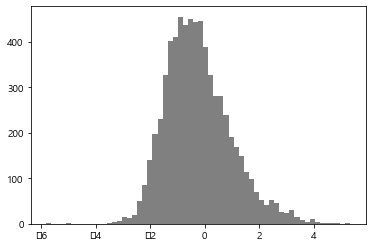

In [245]:
plt.hist(A01_p_absi['ABSI_Z'], bins=60, color='gray')
plt.show()

In [246]:
# ht, wt, wc, bmi와의 corr 확인

df_corr = A01_p_absi[['HEIGHT', 'WEIGHT', 'WAIST', 'BMI', 'ABSI_Z']]
df_corr

,HEIGHT,WEIGHT,WAIST,BMI,ABSI_Z
0,1.575,48.0,0.630,19.349962,-1.394848
1,1.755,75.0,0.813,24.350452,-1.142690
2,1.556,53.6,0.764,22.138368,0.411926
3,1.745,88.0,0.945,28.899599,-0.492933
4,1.547,68.8,1.040,28.748012,1.890970
...,...,...,...,...,...
6750,1.630,80.0,0.847,30.110279,-1.662137
6751,1.606,57.0,0.690,22.099567,-1.552277
6752,1.644,61.0,0.713,22.569722,-1.399732
6753,1.640,68.5,0.830,25.468471,-0.716171


In [247]:
df_corr.corr(method='pearson')

,HEIGHT,WEIGHT,WAIST,BMI,ABSI_Z
HEIGHT,1.000000,0.626964,0.154021,-0.062840,-0.129520
WEIGHT,0.626964,1.000000,0.694144,0.733394,-0.089395
WAIST,0.154021,0.694144,1.000000,0.757444,0.545556
BMI,-0.062840,0.733394,0.757444,1.000000,-0.004208
ABSI_Z,-0.129520,-0.089395,0.545556,-0.004208,1.000000


In [248]:
A01_p_absi.to_csv('0. data\\MME_A01_absi_standardized.csv', encoding = 'euc-kr', index = False)

#### 안산안성 3. 최종 df 생성

보정변수 최종: A01_p_absi             
outcome 최종: disease_df_p    
cancer 추가: Cancer_All

In [10]:
A01_p_absi = pd.read_csv('0. data\\MME_A01_absi_standardized.csv', encoding = 'euc-kr')
disease_df_p = pd.read_csv('0. data\\MME_7disease_outcome.csv', encoding = 'euc-kr')
cancer = pd.read_csv('0. data\\Cancer\\Cancer_ALL.csv', encoding = 'euc-kr')

In [11]:
A01_p_absi

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,R_GTP_TR,HDL_TR,TRIGLY_TR,maxdate,mindate,BMI,ABSI,평균,표준편차,ABSI_Z
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,16.0,52.0,83.0,2014.0,2002.0,19.349962,0.069649,0.075406,0.004127,-1.394848
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,27.0,53.0,69.0,2013.0,2002.0,24.350452,0.073049,0.076898,0.003368,-1.142690
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,38.0,40.0,225.0,2013.0,2002.0,22.138368,0.077683,0.076095,0.003855,0.411926
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,5.0,31.0,122.0,2008.0,2002.0,28.899599,0.075964,0.077712,0.003547,-0.492933
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,47.0,46.0,168.0,2011.0,2002.0,28.748012,0.089101,0.080918,0.004327,1.890970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,11.0,33.0,101.0,2013.0,2002.0,30.110279,0.068546,0.075406,0.004127,-1.662137
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,8.0,69.0,63.0,2013.0,2001.0,22.099567,0.069139,0.075327,0.003987,-1.552277
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,8.0,56.0,108.0,2013.0,2001.0,22.569722,0.069629,0.075406,0.004127,-1.399732
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,115.0,45.0,239.0,2014.0,2003.0,25.468471,0.074872,0.077407,0.003539,-0.716171


In [12]:
A01_p_absi[['maxdate']]

,maxdate
0,2014.0
1,2013.0
2,2013.0
3,2008.0
4,2011.0
...,...
6750,2013.0
6751,2013.0
6752,2013.0
6753,2014.0


In [13]:
disease_df_p

,기수,NIHID,AGE,HTN_final,HTN_age,DM_final,DM_age,MI_final,MI_age,CHF_final,CHF_age,LIP_final,LIP_age,CEVA_final,CEVA_age,GOUT_final,GOUT_age
0,A01,NIH1604000095,43.0,0,NaN,1,49.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
1,A01,NIH1604000171,42.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
2,A01,NIH1604000338,69.0,0,NaN,1,45.0,1,48.0,0,NaN,1,47.0,0,NaN,0,NaN
3,A01,NIH1604000362,48.0,0,NaN,1,61.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
4,A01,NIH1604000424,47.0,1,62.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9051,A01,NIH1604999640,44.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
9052,A01,NIH1604999643,43.0,0,NaN,0,NaN,0,NaN,0,NaN,1,51.0,0,NaN,0,NaN
9053,A01,NIH1604999732,63.0,0,NaN,1,64.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN
9054,A01,NIH1604999772,44.0,1,55.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN


In [14]:
cancer

,NIHID,Cancer,Cancer Time,Cancer name
0,NIH1604000095,0,12.0,NaN
1,NIH1604000171,0,12.0,NaN
2,NIH1604000338,0,12.0,NaN
3,NIH1604000362,0,12.0,NaN
4,NIH1604000424,0,12.0,NaN
...,...,...,...,...
10025,NIH1604999643,0,12.0,NaN
10026,NIH1604999732,1,23.0,HCCCA
10027,NIH1604999772,0,12.0,NaN
10028,NIH1604999929,1,-1.0,BRCA


In [15]:
# disease_df_p에 cancer left join

disease_df_p = pd.merge(disease_df_p, cancer, how='left', on='NIHID')
disease_df_p

,기수,NIHID,AGE,HTN_final,HTN_age,DM_final,DM_age,MI_final,MI_age,CHF_final,CHF_age,LIP_final,LIP_age,CEVA_final,CEVA_age,GOUT_final,GOUT_age,Cancer,Cancer Time,Cancer name
0,A01,NIH1604000095,43.0,0,NaN,1,49.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,12.0,NaN
1,A01,NIH1604000171,42.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,12.0,NaN
2,A01,NIH1604000338,69.0,0,NaN,1,45.0,1,48.0,0,NaN,1,47.0,0,NaN,0,NaN,0,12.0,NaN
3,A01,NIH1604000362,48.0,0,NaN,1,61.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,12.0,NaN
4,A01,NIH1604000424,47.0,1,62.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9051,A01,NIH1604999640,44.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,5.0,BRCA
9052,A01,NIH1604999643,43.0,0,NaN,0,NaN,0,NaN,0,NaN,1,51.0,0,NaN,0,NaN,0,12.0,NaN
9053,A01,NIH1604999732,63.0,0,NaN,1,64.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,23.0,HCCCA
9054,A01,NIH1604999772,44.0,1,55.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,12.0,NaN


In [16]:
disease_df_p.rename(columns = {'Cancer' : 'Cancer_final', 'Cancer Time' : 'Cancer_TIME', 'Cancer name' : 'Cancer_NAME'}, inplace = True)
disease_df_p

,기수,NIHID,AGE,HTN_final,HTN_age,DM_final,DM_age,MI_final,MI_age,CHF_final,CHF_age,LIP_final,LIP_age,CEVA_final,CEVA_age,GOUT_final,GOUT_age,Cancer_final,Cancer_TIME,Cancer_NAME
0,A01,NIH1604000095,43.0,0,NaN,1,49.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,12.0,NaN
1,A01,NIH1604000171,42.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,12.0,NaN
2,A01,NIH1604000338,69.0,0,NaN,1,45.0,1,48.0,0,NaN,1,47.0,0,NaN,0,NaN,0,12.0,NaN
3,A01,NIH1604000362,48.0,0,NaN,1,61.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,12.0,NaN
4,A01,NIH1604000424,47.0,1,62.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9051,A01,NIH1604999640,44.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,5.0,BRCA
9052,A01,NIH1604999643,43.0,0,NaN,0,NaN,0,NaN,0,NaN,1,51.0,0,NaN,0,NaN,0,12.0,NaN
9053,A01,NIH1604999732,63.0,0,NaN,1,64.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,23.0,HCCCA
9054,A01,NIH1604999772,44.0,1,55.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,12.0,NaN


In [17]:
# 고혈압
disease_df_p['HTN_final'].value_counts()

0    6105
1    2951
Name: HTN_final, dtype: int64

In [18]:
# 당뇨
disease_df_p['DM_final'].value_counts()

0    7736
1    1320
Name: DM_final, dtype: int64

In [19]:
# 심근경색
disease_df_p['MI_final'].value_counts()

0    8890
1     166
Name: MI_final, dtype: int64

In [20]:
# 울혈성 심부전
disease_df_p['CHF_final'].value_counts()

0    9020
1      36
Name: CHF_final, dtype: int64

In [21]:
# 고지혈증
disease_df_p['LIP_final'].value_counts()

0    7976
1    1080
Name: LIP_final, dtype: int64

In [22]:
# 뇌혈관질환 (뇌졸중, 중풍 등)
disease_df_p['CEVA_final'].value_counts()

0    8752
1     304
Name: CEVA_final, dtype: int64

In [23]:
# 통풍
disease_df_p['GOUT_final'].value_counts()

0    8465
1     591
Name: GOUT_final, dtype: int64

In [24]:
# 암
disease_df_p['Cancer_final'].value_counts()

0    8779
1     277
Name: Cancer_final, dtype: int64

##### 과거력 변수 추가

In [25]:
disease_df_p

,기수,NIHID,AGE,HTN_final,HTN_age,DM_final,DM_age,MI_final,MI_age,CHF_final,CHF_age,LIP_final,LIP_age,CEVA_final,CEVA_age,GOUT_final,GOUT_age,Cancer_final,Cancer_TIME,Cancer_NAME
0,A01,NIH1604000095,43.0,0,NaN,1,49.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,12.0,NaN
1,A01,NIH1604000171,42.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,12.0,NaN
2,A01,NIH1604000338,69.0,0,NaN,1,45.0,1,48.0,0,NaN,1,47.0,0,NaN,0,NaN,0,12.0,NaN
3,A01,NIH1604000362,48.0,0,NaN,1,61.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,12.0,NaN
4,A01,NIH1604000424,47.0,1,62.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,12.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9051,A01,NIH1604999640,44.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,5.0,BRCA
9052,A01,NIH1604999643,43.0,0,NaN,0,NaN,0,NaN,0,NaN,1,51.0,0,NaN,0,NaN,0,12.0,NaN
9053,A01,NIH1604999732,63.0,0,NaN,1,64.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,23.0,HCCCA
9054,A01,NIH1604999772,44.0,1,55.0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,12.0,NaN


In [26]:
# HTN 과거력
# 0으로 놓고 시작, 발병나이가 첫검진 나이보다 작으면 1로 변경

disease_df_p['PHX_HTN'] = 0
disease_df_p.loc[(disease_df_p['HTN_final'] == 1) & (disease_df_p['AGE'] > disease_df_p['HTN_age']), 'PHX_HTN'] = 1

In [27]:
disease_df_p['PHX_HTN'].value_counts()

0    7823
1    1233
Name: PHX_HTN, dtype: int64

In [28]:
# DM 과거력
# 0으로 놓고 시작, 발병나이가 첫검진 나이보다 작으면 1로 변경

disease_df_p['PHX_DM'] = 0
disease_df_p.loc[(disease_df_p['DM_final'] == 1) & (disease_df_p['AGE'] > disease_df_p['DM_age']), 'PHX_DM'] = 1

In [29]:
disease_df_p['PHX_DM'].value_counts()

0    8522
1     534
Name: PHX_DM, dtype: int64

In [30]:
# MI 과거력
# 0으로 놓고 시작, 발병나이가 첫검진 나이보다 작으면 1로 변경

disease_df_p['PHX_MI'] = 0
disease_df_p.loc[(disease_df_p['MI_final'] == 1) & (disease_df_p['AGE'] > disease_df_p['MI_age']), 'PHX_MI'] = 1

In [31]:
disease_df_p['PHX_MI'].value_counts()

0    8985
1      71
Name: PHX_MI, dtype: int64

In [32]:
# LIP 과거력
# 0으로 놓고 시작, 발병나이가 첫검진 나이보다 작으면 1로 변경

disease_df_p['PHX_LIP'] = 0
disease_df_p.loc[(disease_df_p['LIP_final'] == 1) & (disease_df_p['AGE'] > disease_df_p['LIP_age']), 'PHX_LIP'] = 1

In [33]:
disease_df_p['PHX_LIP'].value_counts()

0    8870
1     186
Name: PHX_LIP, dtype: int64

In [34]:
# CEVA 과거력
# 0으로 놓고 시작, 발병나이가 첫검진 나이보다 작으면 1로 변경

disease_df_p['PHX_CEVA'] = 0
disease_df_p.loc[(disease_df_p['CEVA_final'] == 1) & (disease_df_p['AGE'] > disease_df_p['CEVA_age']), 'PHX_CEVA'] = 1

In [35]:
disease_df_p['PHX_CEVA'].value_counts()

0    8964
1      92
Name: PHX_CEVA, dtype: int64

In [36]:
# GOUT 과거력
# 0으로 놓고 시작, 발병나이가 첫검진 나이보다 작으면 1로 변경

disease_df_p['PHX_GOUT'] = 0
disease_df_p.loc[(disease_df_p['GOUT_final'] == 1) & (disease_df_p['AGE'] > disease_df_p['GOUT_age']), 'PHX_GOUT'] = 1

In [37]:
disease_df_p['PHX_GOUT'].value_counts()

0    8604
1     452
Name: PHX_GOUT, dtype: int64

In [38]:
# cancer 과거력
# 0으로 놓고 시작, Cancer_TIME이 음수면 1로 변경

disease_df_p['PHX_Cancer'] = 0
disease_df_p.loc[(disease_df_p['Cancer_final'] == 1) & (disease_df_p['Cancer_TIME'] < 0), 'PHX_Cancer'] = 1

In [39]:
disease_df_p['PHX_Cancer'].value_counts()

0    9049
1       7
Name: PHX_Cancer, dtype: int64

##### HTN df

In [69]:
# htn df 생성

htn_tmp = disease_df_p[['NIHID', 'HTN_final', 'HTN_age', 'PHX_HTN', 'PHX_DM', 'PHX_MI', 'PHX_LIP', 'PHX_CEVA', 'PHX_GOUT', 'PHX_Cancer']]
htn_df = pd.merge(A01_p_absi, htn_tmp, how='left', on='NIHID')
htn_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,ABSI_Z,HTN_final,HTN_age,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,-1.394848,0,NaN,0,0,0,0,0,0,0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,-1.142690,0,NaN,0,0,0,0,0,0,0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0.411926,0,NaN,0,0,0,0,0,0,0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,-0.492933,1,62.0,0,0,0,0,0,0,0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,1.890970,0,NaN,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,-1.662137,0,NaN,0,0,0,0,0,0,0
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,-1.552277,0,NaN,0,0,0,0,0,0,0
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,-1.399732,0,NaN,0,0,0,0,0,0,0
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,-0.716171,1,55.0,0,0,0,0,0,0,0


In [70]:
htn_df['HTN_final'].value_counts()

0    4650
1    2105
Name: HTN_final, dtype: int64

In [71]:
# TIME 생성

htn_df.loc[htn_df['HTN_final'] == 1, 'TIME'] = htn_df['HTN_age'] - htn_df['AGE']
htn_df.loc[htn_df['HTN_final'] == 0, 'TIME'] = htn_df['maxdate'] - htn_df['mindate'] # edate 최대 최소값 차이
htn_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,HTN_final,HTN_age,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer,TIME
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,0,NaN,0,0,0,0,0,0,0,12.0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,0,NaN,0,0,0,0,0,0,0,11.0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0,NaN,0,0,0,0,0,0,0,11.0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,1,62.0,0,0,0,0,0,0,0,15.0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,0,NaN,0,1,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,0,NaN,0,0,0,0,0,0,0,11.0
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,0,NaN,0,0,0,0,0,0,0,12.0
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,0,NaN,0,0,0,0,0,0,0,12.0
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,1,55.0,0,0,0,0,0,0,0,11.0


In [78]:
# TIME < 0 인 사람 삭제 - HTN

htn_tmp = htn_df.loc[htn_df['TIME'] >= 0].reset_index(drop = True)
htn_df = htn_tmp.copy()
htn_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,HTN_final,HTN_age,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer,TIME
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,0,NaN,0,0,0,0,0,0,0,12.0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,0,NaN,0,0,0,0,0,0,0,11.0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0,NaN,0,0,0,0,0,0,0,11.0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,1,62.0,0,0,0,0,0,0,0,15.0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,0,NaN,0,1,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5895,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,0,NaN,0,0,0,0,0,0,0,11.0
5896,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,0,NaN,0,0,0,0,0,0,0,12.0
5897,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,0,NaN,0,0,0,0,0,0,0,12.0
5898,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,1,55.0,0,0,0,0,0,0,0,11.0


6755 -> 5900

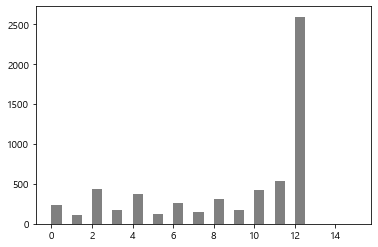

In [79]:
plt.hist(htn_df['TIME'], bins=30, color='gray')
plt.show()

##### DM df

In [80]:
# dm df 생성

dm_tmp = disease_df_p[['NIHID', 'DM_final', 'DM_age', 'PHX_HTN', 'PHX_DM', 'PHX_MI', 'PHX_LIP', 'PHX_CEVA', 'PHX_GOUT', 'PHX_Cancer']]
dm_df = pd.merge(A01_p_absi, dm_tmp, how='left', on='NIHID')
dm_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,ABSI_Z,DM_final,DM_age,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,-1.394848,1,49.0,0,0,0,0,0,0,0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,-1.142690,0,NaN,0,0,0,0,0,0,0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0.411926,1,61.0,0,0,0,0,0,0,0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,-0.492933,0,NaN,0,0,0,0,0,0,0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,1.890970,1,52.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,-1.662137,0,NaN,0,0,0,0,0,0,0
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,-1.552277,0,NaN,0,0,0,0,0,0,0
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,-1.399732,0,NaN,0,0,0,0,0,0,0
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,-0.716171,0,NaN,0,0,0,0,0,0,0


In [81]:
dm_df['DM_final'].value_counts()

0    5918
1     837
Name: DM_final, dtype: int64

In [82]:
# TIME 생성

dm_df.loc[dm_df['DM_final'] == 1, 'TIME'] = dm_df['DM_age'] - dm_df['AGE']
dm_df.loc[dm_df['DM_final'] == 0, 'TIME'] = dm_df['maxdate'] - dm_df['mindate'] # edate 최대 최소값 차이
dm_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,DM_final,DM_age,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer,TIME
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,1,49.0,0,0,0,0,0,0,0,6.0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,0,NaN,0,0,0,0,0,0,0,11.0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,1,61.0,0,0,0,0,0,0,0,13.0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,0,NaN,0,0,0,0,0,0,0,6.0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,1,52.0,0,1,0,0,0,0,0,-16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,0,NaN,0,0,0,0,0,0,0,11.0
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,0,NaN,0,0,0,0,0,0,0,12.0
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,0,NaN,0,0,0,0,0,0,0,12.0
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,0,NaN,0,0,0,0,0,0,0,11.0


In [83]:
# TIME < 0 인 사람 삭제 - dm

dm_tmp = dm_df.loc[dm_df['TIME'] >= 0].reset_index(drop = True)
dm_df = dm_tmp.copy()
dm_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,DM_final,DM_age,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer,TIME
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,1,49.0,0,0,0,0,0,0,0,6.0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,0,NaN,0,0,0,0,0,0,0,11.0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,1,61.0,0,0,0,0,0,0,0,13.0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,0,NaN,0,0,0,0,0,0,0,6.0
4,A01,NIH1604001224,200209.0,5,2,20.7,66.4,3.0,1.0,1.546,...,0,NaN,0,0,0,0,0,0,0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6462,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,0,NaN,0,0,0,0,0,0,0,11.0
6463,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,0,NaN,0,0,0,0,0,0,0,12.0
6464,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,0,NaN,0,0,0,0,0,0,0,12.0
6465,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,0,NaN,0,0,0,0,0,0,0,11.0


6755 -> 6467

##### MI df

In [84]:
# MI df 생성

mi_tmp = disease_df_p[['NIHID', 'MI_final', 'MI_age', 'PHX_HTN', 'PHX_DM', 'PHX_MI', 'PHX_LIP', 'PHX_CEVA', 'PHX_GOUT', 'PHX_Cancer']]
mi_df = pd.merge(A01_p_absi, mi_tmp, how='left', on='NIHID')
mi_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,ABSI_Z,MI_final,MI_age,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,-1.394848,0,NaN,0,0,0,0,0,0,0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,-1.142690,0,NaN,0,0,0,0,0,0,0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0.411926,0,NaN,0,0,0,0,0,0,0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,-0.492933,0,NaN,0,0,0,0,0,0,0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,1.890970,0,NaN,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,-1.662137,0,NaN,0,0,0,0,0,0,0
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,-1.552277,0,NaN,0,0,0,0,0,0,0
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,-1.399732,0,NaN,0,0,0,0,0,0,0
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,-0.716171,0,NaN,0,0,0,0,0,0,0


In [85]:
mi_df['MI_final'].value_counts()

0    6646
1     109
Name: MI_final, dtype: int64

In [86]:
# TIME 생성

mi_df.loc[mi_df['MI_final'] == 1, 'TIME'] = mi_df['MI_age'] - mi_df['AGE']
mi_df.loc[mi_df['MI_final'] == 0, 'TIME'] = mi_df['maxdate'] - mi_df['mindate'] # edate 최대 최소값 차이
mi_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,MI_final,MI_age,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer,TIME
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,0,NaN,0,0,0,0,0,0,0,12.0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,0,NaN,0,0,0,0,0,0,0,11.0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0,NaN,0,0,0,0,0,0,0,11.0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,0,NaN,0,0,0,0,0,0,0,6.0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,0,NaN,0,1,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,0,NaN,0,0,0,0,0,0,0,11.0
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,0,NaN,0,0,0,0,0,0,0,12.0
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,0,NaN,0,0,0,0,0,0,0,12.0
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,0,NaN,0,0,0,0,0,0,0,11.0


In [87]:
# TIME < 0 인 사람 삭제 - mi

mi_tmp = mi_df.loc[mi_df['TIME'] >= 0].reset_index(drop = True)
mi_df = mi_tmp.copy()
mi_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,MI_final,MI_age,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer,TIME
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,0,NaN,0,0,0,0,0,0,0,12.0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,0,NaN,0,0,0,0,0,0,0,11.0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0,NaN,0,0,0,0,0,0,0,11.0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,0,NaN,0,0,0,0,0,0,0,6.0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,0,NaN,0,1,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6697,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,0,NaN,0,0,0,0,0,0,0,11.0
6698,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,0,NaN,0,0,0,0,0,0,0,12.0
6699,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,0,NaN,0,0,0,0,0,0,0,12.0
6700,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,0,NaN,0,0,0,0,0,0,0,11.0


6755 -> 6702

##### LIP df (고지혈증)

In [88]:
# LIP df 생성

lip_tmp = disease_df_p[['NIHID', 'LIP_final', 'LIP_age', 'PHX_HTN', 'PHX_DM', 'PHX_MI', 'PHX_LIP', 'PHX_CEVA', 'PHX_GOUT', 'PHX_Cancer']]
lip_df = pd.merge(A01_p_absi, lip_tmp, how='left', on='NIHID')
lip_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,ABSI_Z,LIP_final,LIP_age,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,-1.394848,0,NaN,0,0,0,0,0,0,0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,-1.142690,0,NaN,0,0,0,0,0,0,0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0.411926,0,NaN,0,0,0,0,0,0,0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,-0.492933,0,NaN,0,0,0,0,0,0,0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,1.890970,0,NaN,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,-1.662137,0,NaN,0,0,0,0,0,0,0
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,-1.552277,0,NaN,0,0,0,0,0,0,0
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,-1.399732,1,51.0,0,0,0,0,0,0,0
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,-0.716171,0,NaN,0,0,0,0,0,0,0


In [89]:
lip_df['LIP_final'].value_counts()

0    5897
1     858
Name: LIP_final, dtype: int64

In [90]:
# TIME 생성

lip_df.loc[lip_df['LIP_final'] == 1, 'TIME'] = lip_df['LIP_age'] - lip_df['AGE']
lip_df.loc[lip_df['LIP_final'] == 0, 'TIME'] = lip_df['maxdate'] - lip_df['mindate'] # edate 최대 최소값 차이
lip_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,LIP_final,LIP_age,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer,TIME
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,0,NaN,0,0,0,0,0,0,0,12.0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,0,NaN,0,0,0,0,0,0,0,11.0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0,NaN,0,0,0,0,0,0,0,11.0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,0,NaN,0,0,0,0,0,0,0,6.0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,0,NaN,0,1,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,0,NaN,0,0,0,0,0,0,0,11.0
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,0,NaN,0,0,0,0,0,0,0,12.0
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,1,51.0,0,0,0,0,0,0,0,8.0
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,0,NaN,0,0,0,0,0,0,0,11.0


In [91]:
# TIME < 0 인 사람 삭제 - lip

lip_tmp = lip_df.loc[lip_df['TIME'] >= 0].reset_index(drop = True)
lip_df = lip_tmp.copy()
lip_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,LIP_final,LIP_age,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer,TIME
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,0,NaN,0,0,0,0,0,0,0,12.0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,0,NaN,0,0,0,0,0,0,0,11.0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0,NaN,0,0,0,0,0,0,0,11.0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,0,NaN,0,0,0,0,0,0,0,6.0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,0,NaN,0,1,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6588,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,0,NaN,0,0,0,0,0,0,0,11.0
6589,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,0,NaN,0,0,0,0,0,0,0,12.0
6590,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,1,51.0,0,0,0,0,0,0,0,8.0
6591,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,0,NaN,0,0,0,0,0,0,0,11.0


6755 -> 6593

##### CEVA df (뇌혈관질환)

In [92]:
# CEVA df 생성

ceva_tmp = disease_df_p[['NIHID', 'CEVA_final', 'CEVA_age', 'PHX_HTN', 'PHX_DM', 'PHX_MI', 'PHX_LIP', 'PHX_CEVA', 'PHX_GOUT', 'PHX_Cancer']]
ceva_df = pd.merge(A01_p_absi, ceva_tmp, how='left', on='NIHID')
ceva_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,ABSI_Z,CEVA_final,CEVA_age,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,-1.394848,0,NaN,0,0,0,0,0,0,0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,-1.142690,0,NaN,0,0,0,0,0,0,0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0.411926,0,NaN,0,0,0,0,0,0,0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,-0.492933,0,NaN,0,0,0,0,0,0,0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,1.890970,0,NaN,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,-1.662137,0,NaN,0,0,0,0,0,0,0
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,-1.552277,0,NaN,0,0,0,0,0,0,0
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,-1.399732,0,NaN,0,0,0,0,0,0,0
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,-0.716171,0,NaN,0,0,0,0,0,0,0


In [93]:
ceva_df['CEVA_final'].value_counts()

0    6537
1     218
Name: CEVA_final, dtype: int64

In [94]:
# TIME 생성

ceva_df.loc[ceva_df['CEVA_final'] == 1, 'TIME'] = ceva_df['CEVA_age'] - ceva_df['AGE']
ceva_df.loc[ceva_df['CEVA_final'] == 0, 'TIME'] = ceva_df['maxdate'] - ceva_df['mindate'] # edate 최대 최소값 차이
ceva_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,CEVA_final,CEVA_age,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer,TIME
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,0,NaN,0,0,0,0,0,0,0,12.0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,0,NaN,0,0,0,0,0,0,0,11.0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0,NaN,0,0,0,0,0,0,0,11.0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,0,NaN,0,0,0,0,0,0,0,6.0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,0,NaN,0,1,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,0,NaN,0,0,0,0,0,0,0,11.0
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,0,NaN,0,0,0,0,0,0,0,12.0
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,0,NaN,0,0,0,0,0,0,0,12.0
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,0,NaN,0,0,0,0,0,0,0,11.0


In [95]:
# TIME < 0 인 사람 삭제 - ceva

ceva_tmp = ceva_df.loc[ceva_df['TIME'] >= 0].reset_index(drop = True)
ceva_df = ceva_tmp.copy()
ceva_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,CEVA_final,CEVA_age,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer,TIME
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,0,NaN,0,0,0,0,0,0,0,12.0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,0,NaN,0,0,0,0,0,0,0,11.0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0,NaN,0,0,0,0,0,0,0,11.0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,0,NaN,0,0,0,0,0,0,0,6.0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,0,NaN,0,1,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6684,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,0,NaN,0,0,0,0,0,0,0,11.0
6685,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,0,NaN,0,0,0,0,0,0,0,12.0
6686,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,0,NaN,0,0,0,0,0,0,0,12.0
6687,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,0,NaN,0,0,0,0,0,0,0,11.0


6755 -> 6689

##### GOUT df (통풍)

In [96]:
# GOUT df 생성

gout_tmp = disease_df_p[['NIHID', 'GOUT_final', 'GOUT_age', 'PHX_HTN', 'PHX_DM', 'PHX_MI', 'PHX_LIP', 'PHX_CEVA', 'PHX_GOUT', 'PHX_Cancer']]
gout_df = pd.merge(A01_p_absi, gout_tmp, how='left', on='NIHID')
gout_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,ABSI_Z,GOUT_final,GOUT_age,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,-1.394848,0,NaN,0,0,0,0,0,0,0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,-1.142690,0,NaN,0,0,0,0,0,0,0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0.411926,0,NaN,0,0,0,0,0,0,0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,-0.492933,0,NaN,0,0,0,0,0,0,0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,1.890970,0,NaN,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,-1.662137,0,NaN,0,0,0,0,0,0,0
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,-1.552277,0,NaN,0,0,0,0,0,0,0
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,-1.399732,0,NaN,0,0,0,0,0,0,0
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,-0.716171,0,NaN,0,0,0,0,0,0,0


In [97]:
gout_df['GOUT_final'].value_counts()

0    6359
1     396
Name: GOUT_final, dtype: int64

In [98]:
# TIME 생성

gout_df.loc[gout_df['GOUT_final'] == 1, 'TIME'] = gout_df['GOUT_age'] - gout_df['AGE']
gout_df.loc[gout_df['GOUT_final'] == 0, 'TIME'] = gout_df['maxdate'] - gout_df['mindate'] # edate 최대 최소값 차이
gout_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,GOUT_final,GOUT_age,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer,TIME
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,0,NaN,0,0,0,0,0,0,0,12.0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,0,NaN,0,0,0,0,0,0,0,11.0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0,NaN,0,0,0,0,0,0,0,11.0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,0,NaN,0,0,0,0,0,0,0,6.0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,0,NaN,0,1,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,0,NaN,0,0,0,0,0,0,0,11.0
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,0,NaN,0,0,0,0,0,0,0,12.0
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,0,NaN,0,0,0,0,0,0,0,12.0
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,0,NaN,0,0,0,0,0,0,0,11.0


In [99]:
# TIME < 0 인 사람 삭제 - gout

gout_tmp = gout_df.loc[gout_df['TIME'] >= 0].reset_index(drop = True)
gout_df = gout_tmp.copy()
gout_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,GOUT_final,GOUT_age,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer,TIME
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,0,NaN,0,0,0,0,0,0,0,12.0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,0,NaN,0,0,0,0,0,0,0,11.0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0,NaN,0,0,0,0,0,0,0,11.0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,0,NaN,0,0,0,0,0,0,0,6.0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,0,NaN,0,1,0,0,0,0,0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6445,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,0,NaN,0,0,0,0,0,0,0,11.0
6446,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,0,NaN,0,0,0,0,0,0,0,12.0
6447,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,0,NaN,0,0,0,0,0,0,0,12.0
6448,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,0,NaN,0,0,0,0,0,0,0,11.0


6755 -> 6450

##### Cancer df

In [100]:
# Cancer df 생성

cancer_tmp = disease_df_p[['NIHID', 'Cancer_final', 'Cancer_TIME', 'PHX_HTN', 'PHX_DM', 'PHX_MI', 'PHX_LIP', 'PHX_CEVA', 'PHX_GOUT', 'PHX_Cancer']]
cancer_df = pd.merge(A01_p_absi, cancer_tmp, how='left', on='NIHID')
cancer_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,ABSI_Z,Cancer_final,Cancer_TIME,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,-1.394848,0,12.0,0,0,0,0,0,0,0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,-1.142690,0,12.0,0,0,0,0,0,0,0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0.411926,0,12.0,0,0,0,0,0,0,0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,-0.492933,0,12.0,0,0,0,0,0,0,0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,1.890970,0,12.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,-1.662137,0,12.0,0,0,0,0,0,0,0
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,-1.552277,1,5.0,0,0,0,0,0,0,0
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,-1.399732,0,12.0,0,0,0,0,0,0,0
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,-0.716171,0,12.0,0,0,0,0,0,0,0


In [101]:
cancer_df['Cancer_final'].value_counts()

0    6541
1     214
Name: Cancer_final, dtype: int64

In [102]:
# Cancer_TIME -> TIME 으로 수정

cancer_df.rename(columns = {'Cancer_TIME' : 'TIME'}, inplace = True)
cancer_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,ABSI_Z,Cancer_final,TIME,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,-1.394848,0,12.0,0,0,0,0,0,0,0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,-1.142690,0,12.0,0,0,0,0,0,0,0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0.411926,0,12.0,0,0,0,0,0,0,0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,-0.492933,0,12.0,0,0,0,0,0,0,0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,1.890970,0,12.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6750,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,-1.662137,0,12.0,0,0,0,0,0,0,0
6751,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,-1.552277,1,5.0,0,0,0,0,0,0,0
6752,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,-1.399732,0,12.0,0,0,0,0,0,0,0
6753,A01,NIH1604999772,200301.0,6,1,17.2,68.5,3.0,2.0,1.640,...,-0.716171,0,12.0,0,0,0,0,0,0,0


In [103]:
# TIME < 0 인 사람 삭제 - Cancer

cancer_tmp = cancer_df.loc[cancer_df['TIME'] >= 0].reset_index(drop = True)
cancer_df = cancer_tmp.copy()
cancer_df

,기수,NIHID,EDATE,VISITALL,SEX,BODYFAT,WEIGHT,DRINK,SMOKE,HEIGHT,...,ABSI_Z,Cancer_final,TIME,PHX_HTN,PHX_DM,PHX_MI,PHX_LIP,PHX_CEVA,PHX_GOUT,PHX_Cancer
0,A01,NIH1604000095,200209.0,6,2,13.4,48.0,3.0,1.0,1.575,...,-1.394848,0,12.0,0,0,0,0,0,0,0
1,A01,NIH1604000171,200201.0,7,1,15.7,75.0,3.0,3.0,1.755,...,-1.142690,0,12.0,0,0,0,0,0,0,0
2,A01,NIH1604000362,200201.0,7,2,14.7,53.6,1.0,1.0,1.556,...,0.411926,0,12.0,0,0,0,0,0,0,0
3,A01,NIH1604000424,200205.0,4,1,19.5,88.0,3.0,3.0,1.745,...,-0.492933,0,12.0,0,0,0,0,0,0,0
4,A01,NIH1604000472,200201.0,5,2,23.4,68.8,1.0,1.0,1.547,...,1.890970,0,12.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740,A01,NIH1604999274,200207.0,3,2,28.9,77.4,2.0,1.0,1.619,...,0.688913,0,12.0,0,1,0,0,0,0,0
6741,A01,NIH1604999446,200201.0,6,2,28.2,80.0,1.0,1.0,1.630,...,-1.662137,0,12.0,0,0,0,0,0,0,0
6742,A01,NIH1604999640,200111.0,7,2,10.7,57.0,3.0,1.0,1.606,...,-1.552277,1,5.0,0,0,0,0,0,0,0
6743,A01,NIH1604999643,200109.0,7,2,16.2,61.0,1.0,1.0,1.644,...,-1.399732,0,12.0,0,0,0,0,0,0,0


6755 -> 6745

-----------------

##### 최종 데이터셋 내보내기

In [107]:
# 최종 n수 count

print(htn_df['HTN_final'].value_counts())
print(dm_df['DM_final'].value_counts())
print(mi_df['MI_final'].value_counts())
print(lip_df['LIP_final'].value_counts())
print(ceva_df['CEVA_final'].value_counts())
print(gout_df['GOUT_final'].value_counts())
print(cancer_df['Cancer_final'].value_counts())

0    4650
1    1250
Name: HTN_final, dtype: int64
0    5918
1     549
Name: DM_final, dtype: int64
0    6646
1      56
Name: MI_final, dtype: int64
0    5897
1     696
Name: LIP_final, dtype: int64
0    6537
1     152
Name: CEVA_final, dtype: int64
0    6359
1      91
Name: GOUT_final, dtype: int64
0    6537
1     208
Name: Cancer_final, dtype: int64


In [108]:
htn_df.to_csv('0. data\\국건영_ABSI\\absi_htn.csv', encoding = 'euc-kr', index = False)
dm_df.to_csv('0. data\\국건영_ABSI\\absi_dm.csv', encoding = 'euc-kr', index = False)
mi_df.to_csv('0. data\\국건영_ABSI\\absi_mi.csv', encoding = 'euc-kr', index = False)
lip_df.to_csv('0. data\\국건영_ABSI\\absi_lip.csv', encoding = 'euc-kr', index = False)
ceva_df.to_csv('0. data\\국건영_ABSI\\absi_ceva.csv', encoding = 'euc-kr', index = False)
gout_df.to_csv('0. data\\국건영_ABSI\\absi_gout.csv', encoding = 'euc-kr', index = False)
cancer_df.to_csv('0. data\\국건영_ABSI\\absi_cancer.csv', encoding = 'euc-kr', index = False)

In [109]:
tt = htn_df.loc[htn_df['TIME'] < 0]
tt[['AGE', 'HTN_age', 'TIME']]

,AGE,HTN_age,TIME


#### ABSI는 체지방량, 근육량을 얼마나 설명하는가?          

In [3]:
A01 = pd.read_csv('0. data\\MME_preprocessed\\MME_A01.csv', encoding = 'euc-kr')

A02 = pd.read_csv('0. data\\MME_preprocessed\\MME_A02.csv', encoding = 'euc-kr')

A03 = pd.read_csv('0. data\\MME_preprocessed\\MME_A03.csv', encoding = 'euc-kr')

A04 = pd.read_csv('0. data\\MME_preprocessed\\MME_A04.csv', encoding = 'euc-kr')

A05 = pd.read_csv('0. data\\MME_preprocessed\\MME_A05.csv', encoding = 'euc-kr')

A06 = pd.read_csv('0. data\\MME_preprocessed\\MME_A06.csv', encoding = 'euc-kr')

A07 = pd.read_csv('0. data\\MME_preprocessed\\MME_A07.csv', encoding = 'euc-kr')

In [4]:
A01

,기수,NIHID,SEX,VISITALL,PHYSTB,PHYSIT,PHYACTL,PHYACTM,PHYACTH,AEROBFQ,...,FMCDMAG,FMHEA,FMFHEA,FMFHEAAG,FMMHEA,FMMHEAAG,FMBHEA,FMBHEAAG,FMCHEA,FMCHEAAG
0,A01,NIH1604000095,2,6,1,5,7,6,4,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
1,A01,NIH1604000171,1,7,0,3,8,8,0,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
2,A01,NIH1604000338,1,7,2,5,3,0,7,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
3,A01,NIH1604000362,2,7,0,5,4,2,2,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
4,A01,NIH1604000424,1,4,8,5,8,8,0,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10025,A01,NIH1604999643,2,7,3,6,8,5,0,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
10026,A01,NIH1604999732,1,6,1,5,2,0,8,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
10027,A01,NIH1604999772,1,6,2,8,5,0,0,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666
10028,A01,NIH1604999929,2,4,2,6,6,0,0,99999,...,66666,1,1,77777,1,77777,1,77777,66666,66666


In [29]:
# 근육량 - IB1_3
# 체지방량 - BODYFAT

A01_p = A01[['NIHID', 'IB1_3']]
A01_p

,NIHID,IB1_3
0,NIH1604000095,32.8
1,NIH1604000171,55.3
2,NIH1604000338,99999.0
3,NIH1604000362,36.6
4,NIH1604000424,64.1
...,...,...
10025,NIH1604999643,42.3
10026,NIH1604999732,99999.0
10027,NIH1604999772,48.7
10028,NIH1604999929,38.8


In [30]:
# 55555 -> nan으로 변경

col = A01_p.columns.tolist()

A01_p = A01_p[A01_p[col] != 55555]  # 전부 NaN으로 변경
A01_p.reset_index(drop = True, inplace = True)
A01_p

,NIHID,IB1_3
0,NIH1604000095,32.8
1,NIH1604000171,55.3
2,NIH1604000338,99999.0
3,NIH1604000362,36.6
4,NIH1604000424,64.1
...,...,...
10025,NIH1604999643,42.3
10026,NIH1604999732,99999.0
10027,NIH1604999772,48.7
10028,NIH1604999929,38.8


In [31]:
# 66666 -> nan으로 변경

col = A01_p.columns.tolist()

A01_p = A01_p[A01_p[col] != 66666]  # 전부 NaN으로 변경
A01_p.reset_index(drop = True, inplace = True)
A01_p

,NIHID,IB1_3
0,NIH1604000095,32.8
1,NIH1604000171,55.3
2,NIH1604000338,99999.0
3,NIH1604000362,36.6
4,NIH1604000424,64.1
...,...,...
10025,NIH1604999643,42.3
10026,NIH1604999732,99999.0
10027,NIH1604999772,48.7
10028,NIH1604999929,38.8


In [32]:
# 77777 -> nan으로 변경

col = A01_p.columns.tolist()

A01_p = A01_p[A01_p[col] != 77777]  # 전부 NaN으로 변경
A01_p.reset_index(drop = True, inplace = True)
A01_p

,NIHID,IB1_3
0,NIH1604000095,32.8
1,NIH1604000171,55.3
2,NIH1604000338,99999.0
3,NIH1604000362,36.6
4,NIH1604000424,64.1
...,...,...
10025,NIH1604999643,42.3
10026,NIH1604999732,99999.0
10027,NIH1604999772,48.7
10028,NIH1604999929,38.8


In [33]:
# 88888 -> nan으로 변경

col = A01_p.columns.tolist()

A01_p = A01_p[A01_p[col] != 88888]  # 전부 NaN으로 변경
A01_p.reset_index(drop = True, inplace = True)
A01_p

,NIHID,IB1_3
0,NIH1604000095,32.8
1,NIH1604000171,55.3
2,NIH1604000338,99999.0
3,NIH1604000362,36.6
4,NIH1604000424,64.1
...,...,...
10025,NIH1604999643,42.3
10026,NIH1604999732,99999.0
10027,NIH1604999772,48.7
10028,NIH1604999929,38.8


In [34]:
# 99999 -> nan으로 변경

col = A01_p.columns.tolist()

A01_p = A01_p[A01_p[col] != 99999]  # 전부 NaN으로 변경
A01_p.reset_index(drop = True, inplace = True)
A01_p

,NIHID,IB1_3
0,NIH1604000095,32.8
1,NIH1604000171,55.3
2,NIH1604000338,NaN
3,NIH1604000362,36.6
4,NIH1604000424,64.1
...,...,...
10025,NIH1604999643,42.3
10026,NIH1604999732,NaN
10027,NIH1604999772,48.7
10028,NIH1604999929,38.8


In [35]:
A01_p.dropna(inplace = True)
A01_p.reset_index(drop = True, inplace = True)

In [36]:
A01_p

,NIHID,IB1_3
0,NIH1604000095,32.8
1,NIH1604000171,55.3
2,NIH1604000362,36.6
3,NIH1604000424,64.1
4,NIH1604000472,42.8
...,...,...
7834,NIH1604999640,43.5
7835,NIH1604999643,42.3
7836,NIH1604999772,48.7
7837,NIH1604999929,38.8


In [37]:
A01_p

,NIHID,IB1_3
0,NIH1604000095,32.8
1,NIH1604000171,55.3
2,NIH1604000362,36.6
3,NIH1604000424,64.1
4,NIH1604000472,42.8
...,...,...
7834,NIH1604999640,43.5
7835,NIH1604999643,42.3
7836,NIH1604999772,48.7
7837,NIH1604999929,38.8


In [40]:
# MME_MuscleMass.csv 생성

A01_p.to_csv('0. data\\국건영_ABSI\\MME_MM.csv', encoding = 'euc-kr', index = False)